<a href="https://colab.research.google.com/github/Pooja219843/yolov8-virat-mini/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.3 MB/s eta 0:00:00


In [ ]:
!ls /content/runs/detect/train


args.yaml  weights


In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/VIRAT


Mounted at /content/drive
 data.yaml	       runs    valid
 README.dataset.txt    test    virat_test.yaml
 README.roboflow.txt   train  'VIRAT v2.v3-virat_v2.2_mocaic.yolov8.zip'


In [19]:
from ultralytics import YOLO
import yaml
from pathlib import Path
import cv2
import pandas as pd
import os

# ===============================================================
# 🚀 YOLOv8 Performance Analyzer for Google Drive Dataset
# ===============================================================
class YOLOv8PerformanceAnalyzer:
    def __init__(self, model_path, dataset_path, yaml_path, num_images=10):
        self.model_path = Path(model_path)
        self.dataset_path = Path(dataset_path)
        self.yaml_path = Path(yaml_path)
        self.num_images = num_images

        print("🚀 Loading YOLOv8 model...")
        self.model = YOLO(str(self.model_path))
        print("✅ Model loaded successfully!")

        # ✅ Automatically get correct class names from model to avoid IndexError
        self.class_names = self.model.names
        print(f"✅ Classes loaded: {list(self.class_names.values())}")

    def analyze(self):
        # ✅ Get image paths
        image_paths = list(self.dataset_path.glob("*.jpg"))[:self.num_images]
        if not image_paths:
            raise FileNotFoundError(f"No JPG images found in {self.dataset_path}")

        print(f"🔍 Running inference on {len(image_paths)} sample images...")

        results_data = []

        for img_path in image_paths:
            results = self.model(img_path)
            boxes = results[0].boxes

            for box in boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])

                results_data.append({
                    "image": img_path.name,
                    "class": self.class_names.get(cls, f"cls_{cls}"),  # Safe lookup
                    "confidence": round(conf, 3)
                })

        df = pd.DataFrame(results_data)
        print("\n✅ Inference complete! Sample results:\n")
        print(df.head())
        return df


# ===============================================================
# ✅ Function to check dataset paths before running inference
# ===============================================================
def check_dataset_paths(base_path):
    print("\n🔎 Checking all required paths...\n")

    base = Path(base_path)
    paths = {
        "Dataset Folder": base,
        "Train Images": base / "train/images",
        "Train Labels": base / "train/labels",
        "Validation Images": base / "valid/images",
        "Validation Labels": base / "valid/labels",
        "Test Folder": base / "test",
        "Data YAML": base / "data.yaml",
    }

    for name, path in paths.items():
        if path.exists():
            print(f"✅ {name:<25} found at → {path}")
        else:
            print(f"❌ {name:<25} NOT FOUND → {path}")

    print("\n✅ Path check complete!\n")


# ===============================================================
# 🧠 MAIN EXECUTION
# ===============================================================
if __name__ == "__main__":
    # ✅ Step 1: Check all paths first
    check_dataset_paths("/content/drive/MyDrive/VIRAT")

    # ✅ Step 2: Run performance analysis
    analyzer = YOLOv8PerformanceAnalyzer(
        model_path="yolov8n.pt",  # or your trained model, e.g. best.pt
        dataset_path="/content/drive/MyDrive/VIRAT/train/images",
        yaml_path="/content/drive/MyDrive/VIRAT/data.yaml",
        num_images=10
    )

    df = analyzer.analyze()



🔎 Checking all required paths...

✅ Dataset Folder            found at → /content/drive/MyDrive/VIRAT
✅ Train Images              found at → /content/drive/MyDrive/VIRAT/train/images
✅ Train Labels              found at → /content/drive/MyDrive/VIRAT/train/labels
✅ Validation Images         found at → /content/drive/MyDrive/VIRAT/valid/images
✅ Validation Labels         found at → /content/drive/MyDrive/VIRAT/valid/labels
✅ Test Folder               found at → /content/drive/MyDrive/VIRAT/test
✅ Data YAML                 found at → /content/drive/MyDrive/VIRAT/data.yaml

✅ Path check complete!

🚀 Loading YOLOv8 model...
✅ Model loaded successfully!
✅ Classes loaded: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'sno


📊 Generating performance visualizations...

========== SUMMARY REPORT ==========
Total detections: 182
Unique classes detected: 8

🔹 Average confidence per class:
class
stop sign       0.874000
train           0.708000
person          0.500833
car             0.499811
truck           0.472000
motorcycle      0.403000
bus             0.394462
potted plant    0.252000
Name: confidence, dtype: float64


/tmp/ipython-input-2553421012.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.values, y=class_counts.index, palette="Blues_r")


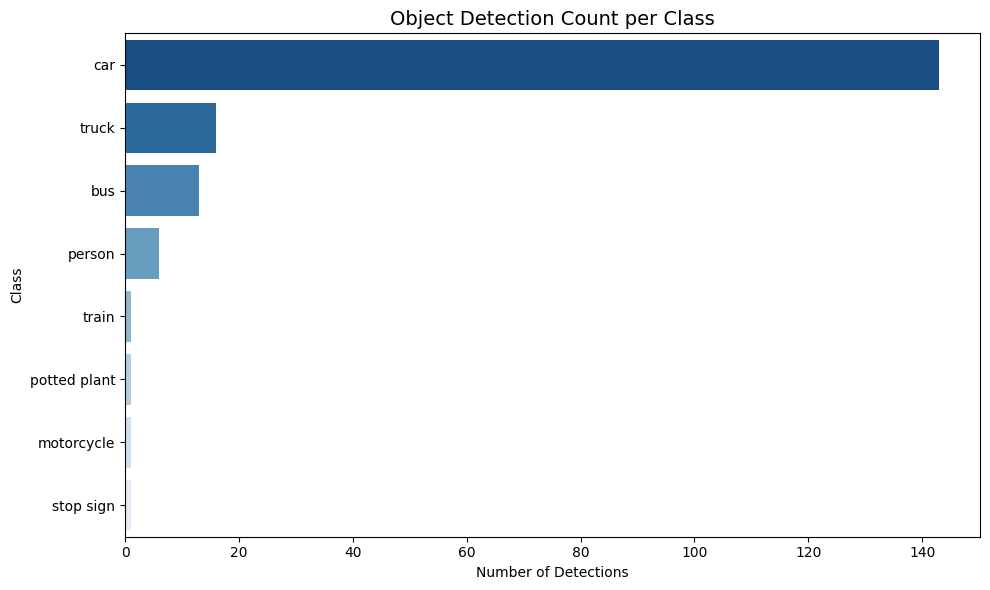

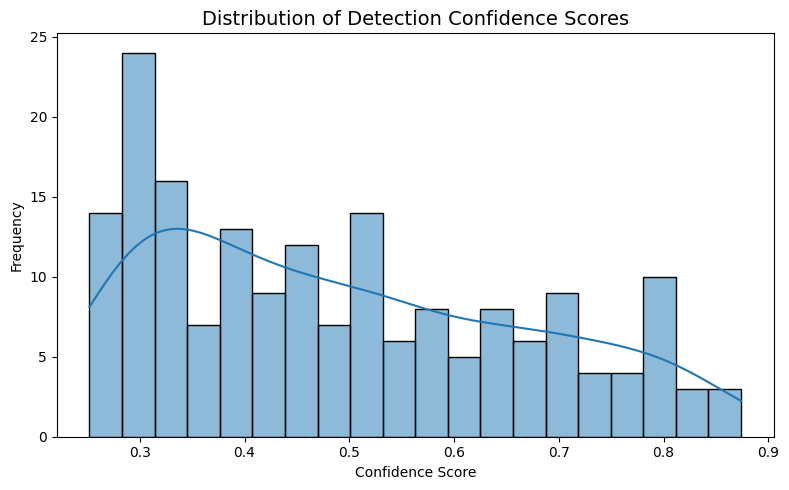

/tmp/ipython-input-2553421012.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_conf_per_class.values, y=avg_conf_per_class.index, palette="viridis")


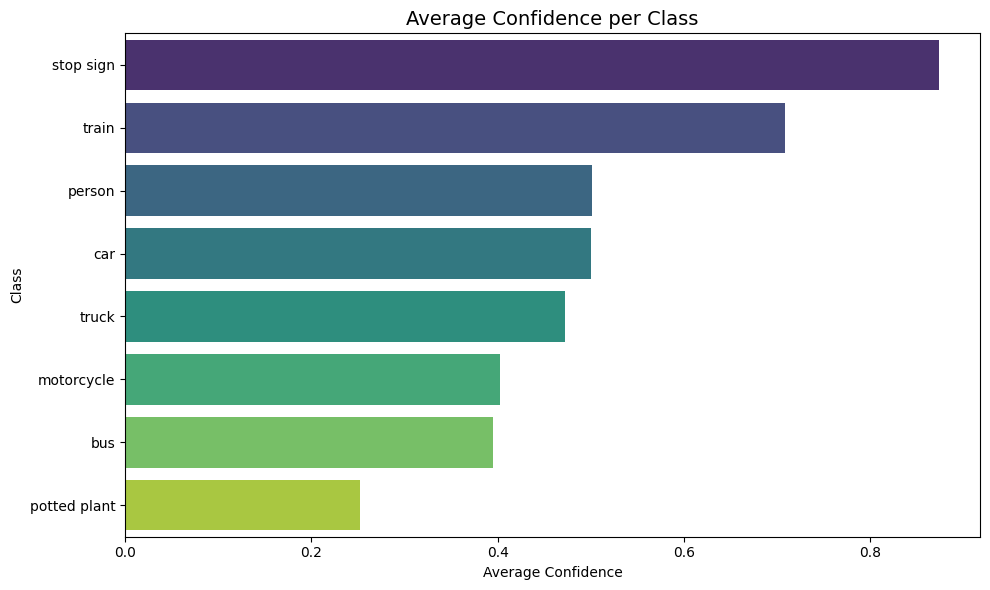


✅ Visualization complete!


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# ===============================================================
# 📊 Visualization and Statistical Analysis
# ===============================================================
def visualize_results(df):
    print("\n📊 Generating performance visualizations...\n")

    # 🧮 Count detections per class
    class_counts = df['class'].value_counts()
    avg_conf_per_class = df.groupby('class')['confidence'].mean().sort_values(ascending=False)

    # 🧠 Print summary stats
    print("========== SUMMARY REPORT ==========")
    print(f"Total detections: {len(df)}")
    print(f"Unique classes detected: {df['class'].nunique()}")
    print("\n🔹 Average confidence per class:")
    print(avg_conf_per_class)
    print("====================================")

    # 🎨 1. Bar Plot — Detection Counts per Class
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.values, y=class_counts.index, palette="Blues_r")
    plt.title("Object Detection Count per Class", fontsize=14)
    plt.xlabel("Number of Detections")
    plt.ylabel("Class")
    plt.tight_layout()
    plt.show()

    # 🎨 2. Histogram — Confidence Distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df['confidence'], bins=20, kde=True)
    plt.title("Distribution of Detection Confidence Scores", fontsize=14)
    plt.xlabel("Confidence Score")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # 🎨 3. Combined Confidence per Class
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_conf_per_class.values, y=avg_conf_per_class.index, palette="viridis")
    plt.title("Average Confidence per Class", fontsize=14)
    plt.xlabel("Average Confidence")
    plt.ylabel("Class")
    plt.tight_layout()
    plt.show()

    print("\n✅ Visualization complete!")


# ===============================================================
# 🧠 Run visualizer on previous YOLO results
# ===============================================================
visualize_results(df)


📊 Detection Summary:
class
car             143
truck            16
bus              13
person            6
train             1
potted plant      1
motorcycle        1
stop sign         1
Name: count, dtype: int64

🎯 Average Confidence by Class:
class
stop sign       0.874000
train           0.708000
person          0.500833
car             0.499811
truck           0.472000
motorcycle      0.403000
bus             0.394462
potted plant    0.252000
Name: confidence, dtype: float64


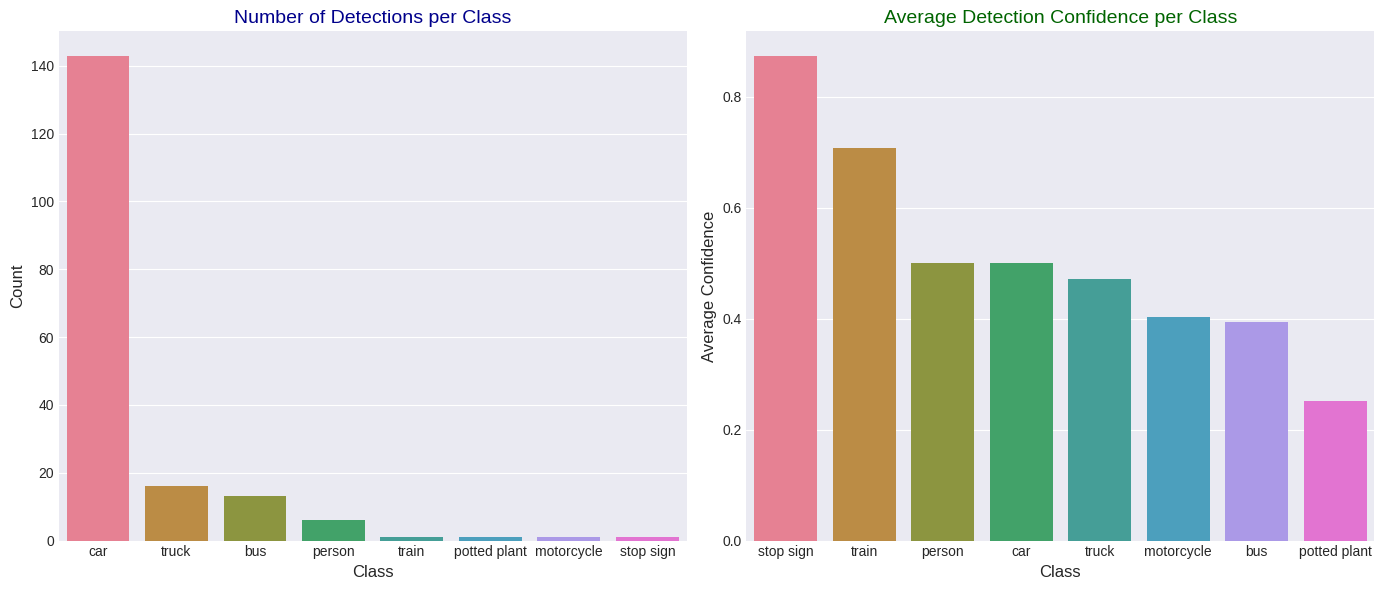

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example structure of df (make sure you have these columns)
# df = pd.DataFrame({
#     "image": ["img1.jpg", "img2.jpg", "img3.jpg"],
#     "class": ["car", "person", "car"],
#     "confidence": [0.91, 0.85, 0.76]
# })

def colorful_visualizer(df):
    if df.empty:
        print("⚠️ No detection data found!")
        return

    # 🎨 Seaborn + Matplotlib styling
    plt.style.use("seaborn-v0_8-darkgrid")
    sns.set_palette("viridis")

    # 🧮 Summary calculations
    class_counts = df['class'].value_counts()
    avg_conf = df.groupby('class')['confidence'].mean().sort_values(ascending=False)

    print("📊 Detection Summary:")
    print(class_counts)
    print("\n🎯 Average Confidence by Class:")
    print(avg_conf)

    plt.figure(figsize=(14, 6))

    # 🌈 Plot 1: Object counts
    plt.subplot(1, 2, 1)
    sns.barplot(
        x=class_counts.index,
        y=class_counts.values,
        hue=class_counts.index,
        dodge=False,
        legend=False
    )
    plt.title("Number of Detections per Class", fontsize=14, color='darkblue')
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # 🌟 Plot 2: Average confidence
    plt.subplot(1, 2, 2)
    sns.barplot(
        x=avg_conf.index,
        y=avg_conf.values,
        hue=avg_conf.index,
        dodge=False,
        legend=False
    )
    plt.title("Average Detection Confidence per Class", fontsize=14, color='darkgreen')
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Average Confidence", fontsize=12)

    plt.tight_layout()
    plt.show()

# ✅ Call function with your dataframe
colorful_visualizer(df)


In [15]:
!ls /content/drive/MyDrive/VIRAT


 data.yaml	       runs    valid
 README.dataset.txt    test    virat_test.yaml
 README.roboflow.txt   train  'VIRAT v2.v3-virat_v2.2_mocaic.yolov8.zip'


In [16]:
from pathlib import Path

# Base dataset directory
base = Path("/content/drive/MyDrive/VIRAT")

# Important paths
paths = {
    "Dataset Folder": base,
    "Train Images": base / "train" / "images",
    "Train Labels": base / "train" / "labels",
    "Validation Images": base / "valid" / "images",
    "Validation Labels": base / "valid" / "labels",
    "Test Folder": base / "test",
    "Data YAML": base / "data.yaml",
}

# Check each path
print("🔍 Checking all required paths...\n")
for name, p in paths.items():
    if p.exists():
        print(f"✅ {name:<25} found at → {p}")
    else:
        print(f"❌ {name:<25} MISSING! Expected at → {p}")

print("\n✅ Path check complete!")


🔍 Checking all required paths...

✅ Dataset Folder            found at → /content/drive/MyDrive/VIRAT
✅ Train Images              found at → /content/drive/MyDrive/VIRAT/train/images
✅ Train Labels              found at → /content/drive/MyDrive/VIRAT/train/labels
✅ Validation Images         found at → /content/drive/MyDrive/VIRAT/valid/images
✅ Validation Labels         found at → /content/drive/MyDrive/VIRAT/valid/labels
✅ Test Folder               found at → /content/drive/MyDrive/VIRAT/test
✅ Data YAML                 found at → /content/drive/MyDrive/VIRAT/data.yaml

✅ Path check complete!


In [6]:
!find /content/drive -name "data.yaml"


/content/drive/Othercomputers/My Laptop/Desktop/python/data.yaml
/content/drive/MyDrive/VIRAT/data.yaml


In [7]:
!ls /content/drive/MyDrive/VIRAT/train/images | head


VIRAT_S_000001_FRM_00474_BG_jpg.rf.596ece656692c6c01e199c27f1786408.jpg
VIRAT_S_000001_FRM_00552_BG_jpg.rf.0548e2c6bc6d51bab7571dbcc3e39dd0.jpg
VIRAT_S_000001_FRM_03293_BG_jpg.rf.1a0ed7bb4e231b17742e3d26957209ce.jpg
VIRAT_S_000001_FRM_03293_BG_jpg.rf.60014b7159a2609cf122069385e2318f.jpg
VIRAT_S_000001_FRM_03868_jpg.rf.ba4c319237841069788ba06a62e164ec.jpg
VIRAT_S_000001_FRM_04067_jpg.rf.1f6afee7dc38c81792c5bfb4f567c754.jpg
VIRAT_S_000001_FRM_04385_jpg.rf.08c1e2c63db7e3dbd3d6e85223fa30ef.jpg
VIRAT_S_000001_FRM_04563_jpg.rf.9ce0c3e0f5a384be8a7a2c8c30eaade9.jpg
VIRAT_S_000001_FRM_04563_jpg.rf.c4bee2378c5712360f4a9494922e63d1.jpg
VIRAT_S_000001_FRM_05005_jpg.rf.efce05e5b714176b311c25fe04ceb3a3.jpg


In [9]:
!cat /content/drive/MyDrive/VIRAT/data.yaml


# data.yaml for VIRAT YOLOv8 training

# Number of classes
nc: 4

# Class names (order must match the IDs used in your label .txt files)
names: ['person', 'car', 'bicycle', 'dog']

# Paths to images
train: /content/drive/MyDrive/VIRAT/train/images
val: /content/drive/MyDrive/VIRAT/val/images
test: /content/drive/MyDrive/VIRAT/test/images


In [ ]:
# Replace contents of data.yaml with correct paths
new_yaml = """
train: /content/drive/MyDrive/VIRAT/train/images
val: /content/drive/MyDrive/VIRAT/valid/images
test: /content/drive/MyDrive/VIRAT/test/images

nc: 1
names: ['person']
"""

with open("/content/drive/MyDrive/VIRAT/data.yaml", "w") as f:
    f.write(new_yaml)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 nano (fastest and smallest model)
model = YOLO("yolov8n.pt")

# Train with fewer epochs and a fraction of dataset
results = model.train(
    data="/content/drive/MyDrive/VIRAT/data.yaml",
    epochs=5,        # just 5 epochs for quick test
    imgsz=320,       # smaller image size -> faster
    batch=8,         # small batch size for speed
    fraction=0.1     # only 10% of dataset
)


Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/VIRAT/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=0.1, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train5/weights/best.pt")

# Run inference on test images
results = model.predict(
    source="/content/drive/MyDrive/VIRAT/test/images",
    imgsz=320,
    save=True  # saves annotated images to runs/detect/predict
)

print("Predictions saved to:", results[0].save_dir)



image 1/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_03940_jpg.rf.8c57e708bf5987fbaf50be97c689f4dd.jpg: 320x320 (no detections), 6.2ms
image 2/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_04517_jpg.rf.d91023caed88eb74001e5c570acba716.jpg: 320x320 (no detections), 9.5ms
image 3/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_06210_jpg.rf.7722f14a2c6ed641a952c34b7c84370c.jpg: 320x320 (no detections), 11.8ms
image 4/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_06308_jpg.rf.11b7b159f29f0af30b2dbe78aeead914.jpg: 320x320 (no detections), 8.3ms
image 5/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_07998_jpg.rf.c2a8121e8b9e15a483a827629b05b69a.jpg: 320x320 (no detections), 7.2ms
image 6/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_10259_jpg.rf.6bf578b7cf1aa4bcc5349b2ab460de41.jpg: 320x320 (no detections), 8.1ms
image 7/163 /content/drive/MyDrive/VIRAT/test/images/VIRAT_S_000001_FRM_16

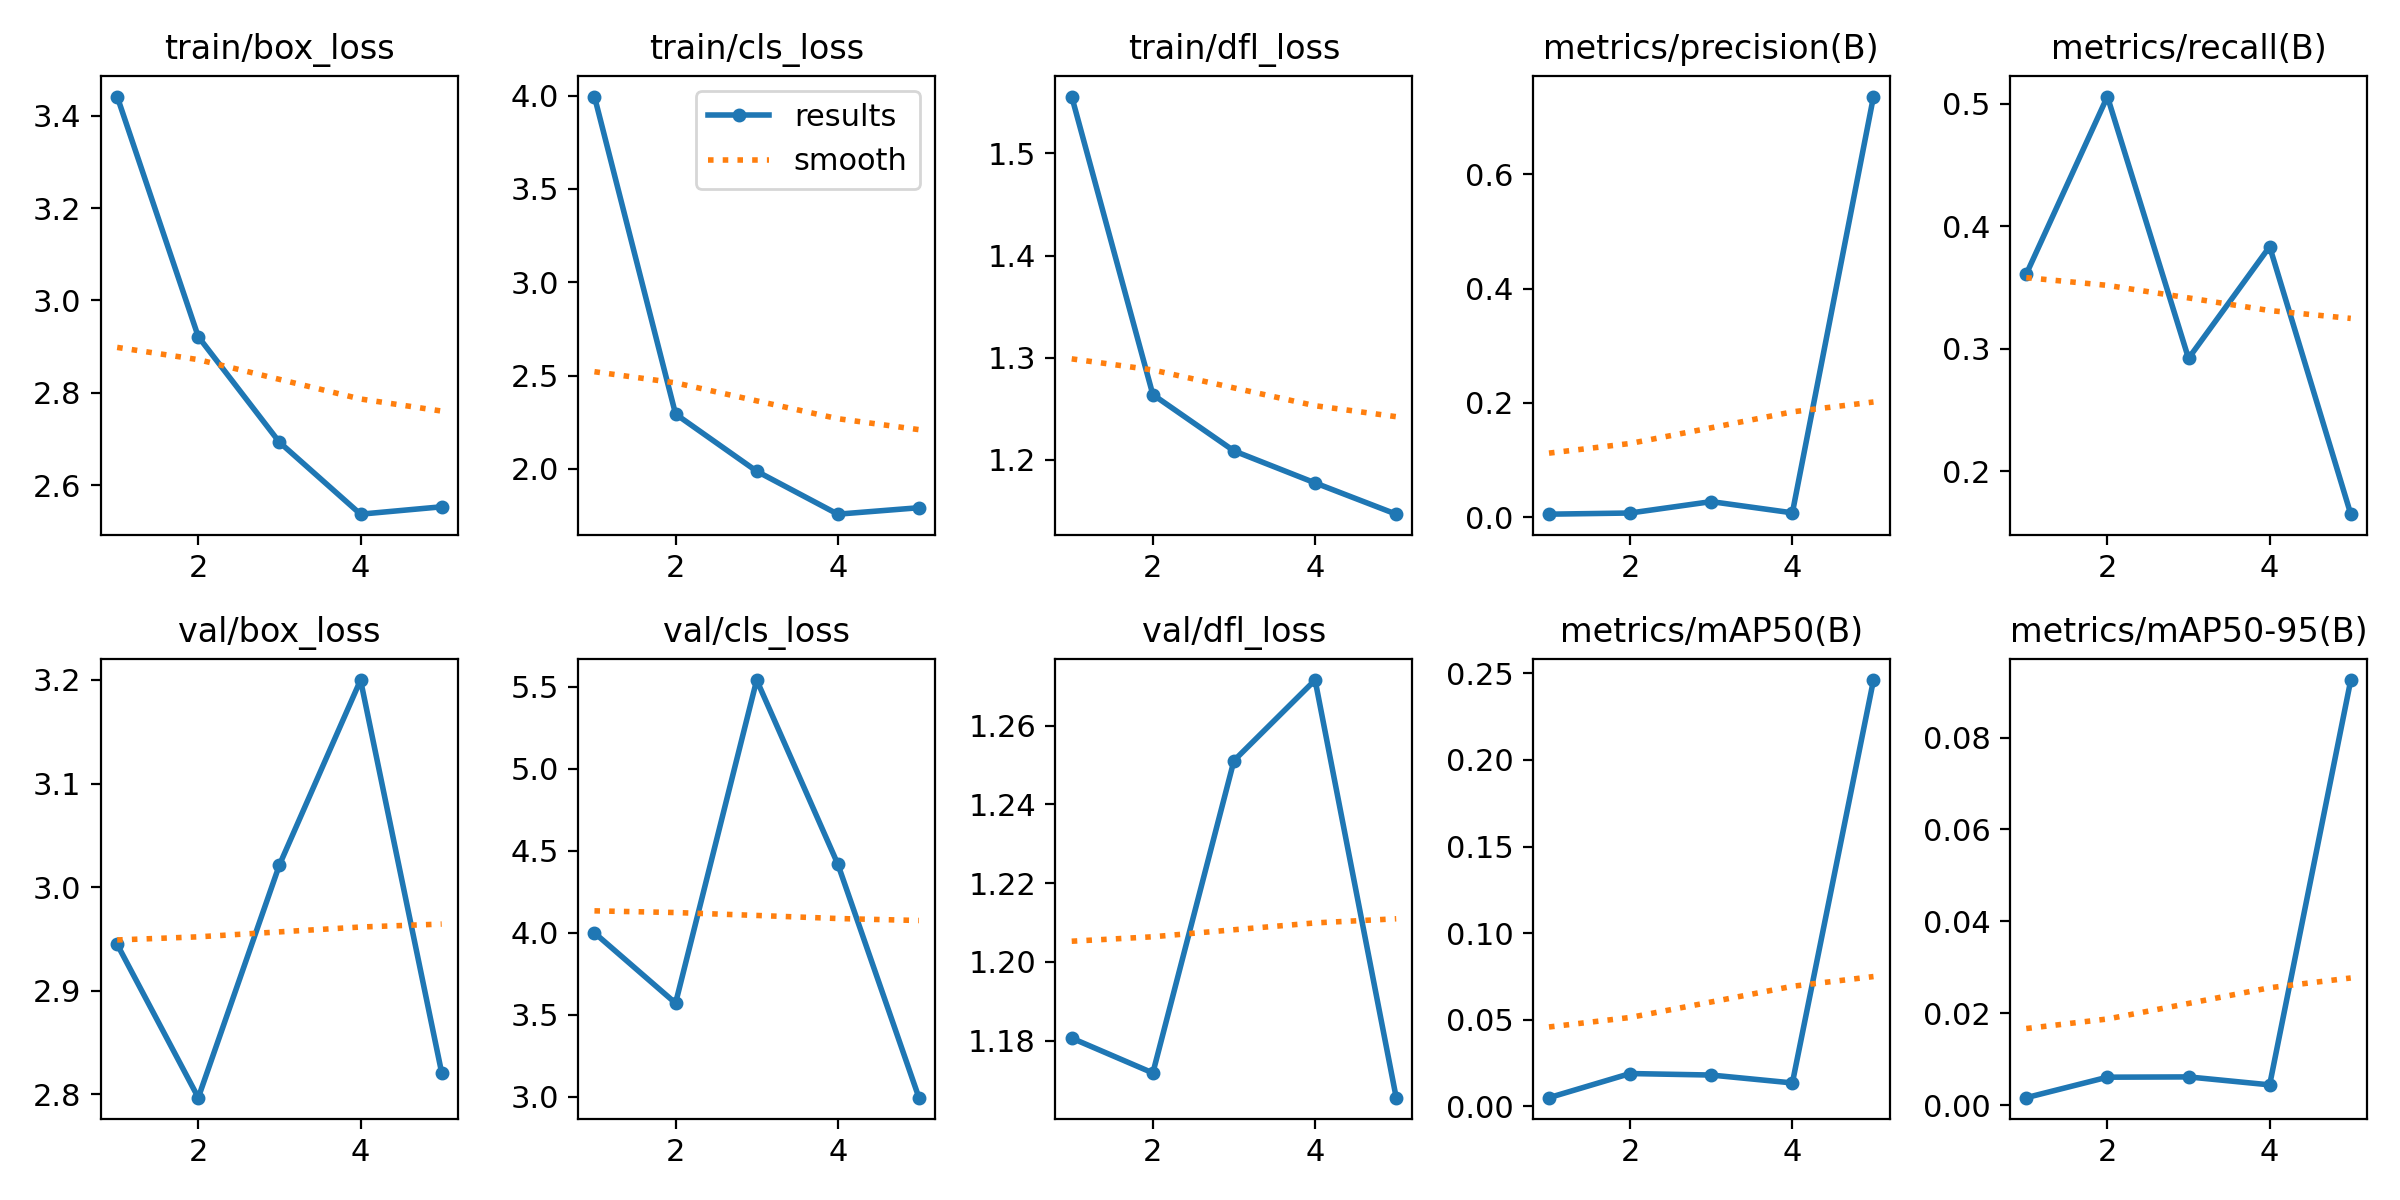

In [ ]:
from IPython.display import Image

# Training results (loss, mAP, PR curves)
Image(filename='/content/runs/detect/train5/results.png')


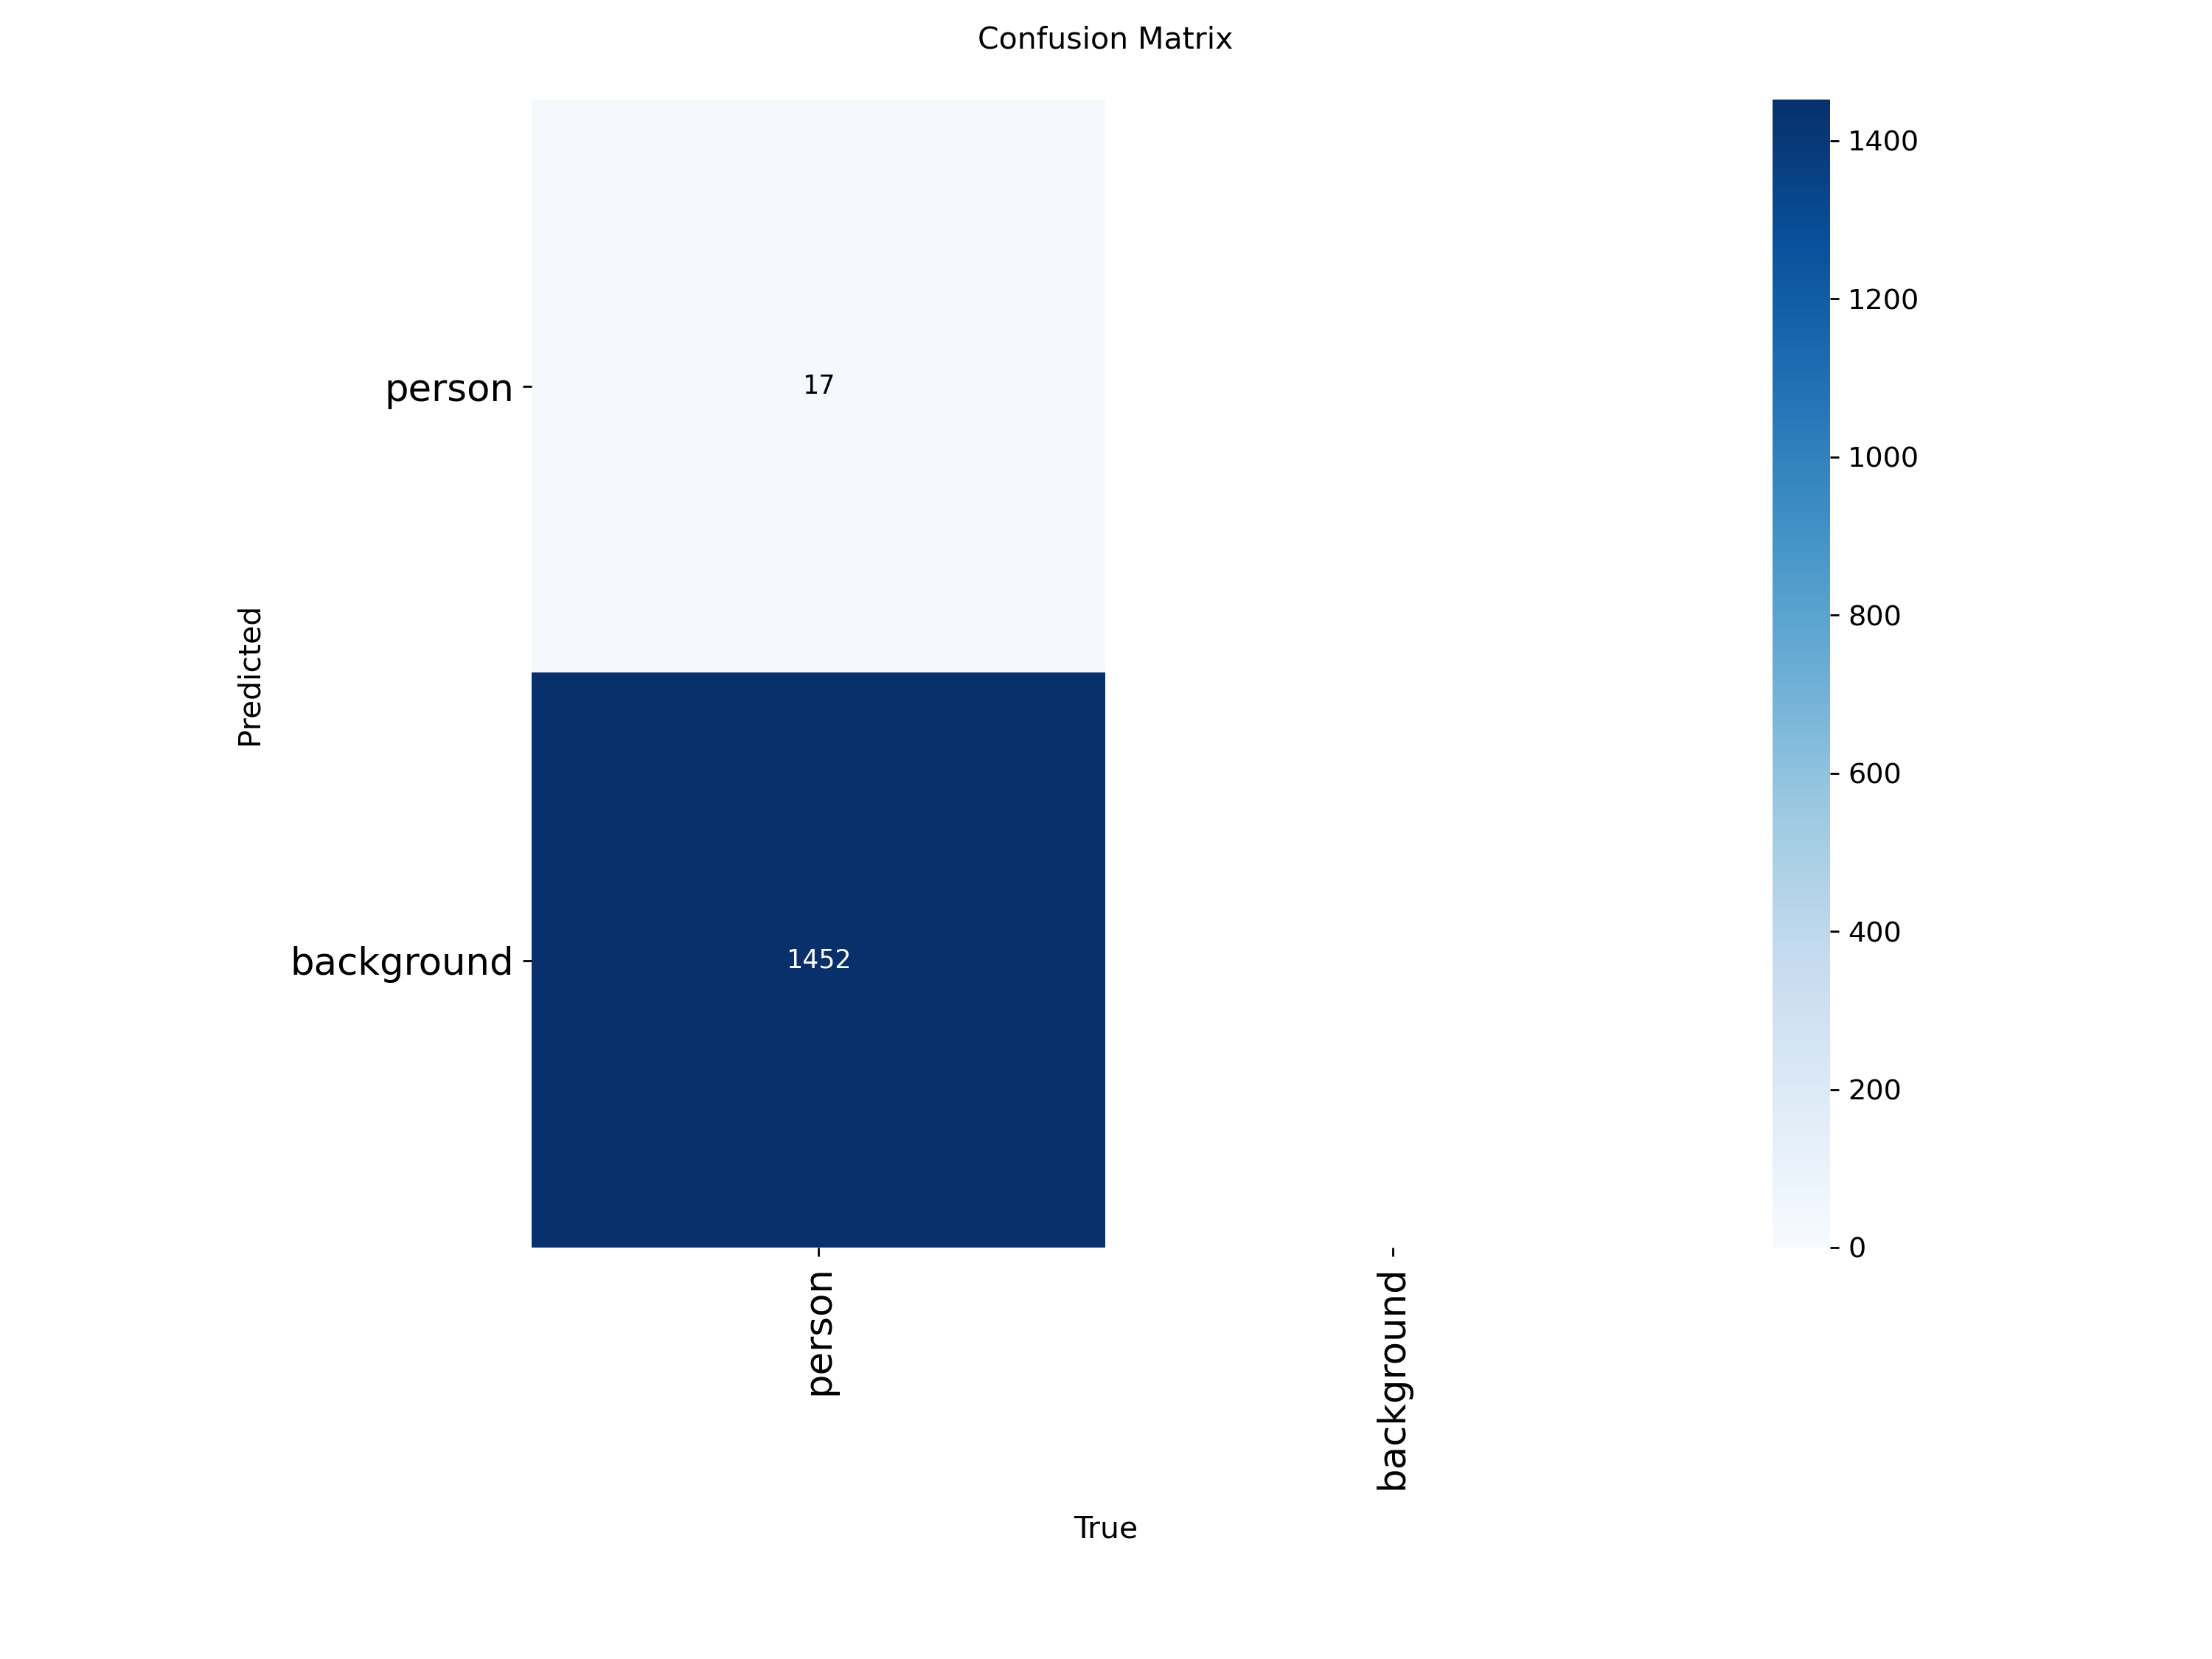

In [ ]:
Image(filename='/content/runs/detect/train5/confusion_matrix.png')


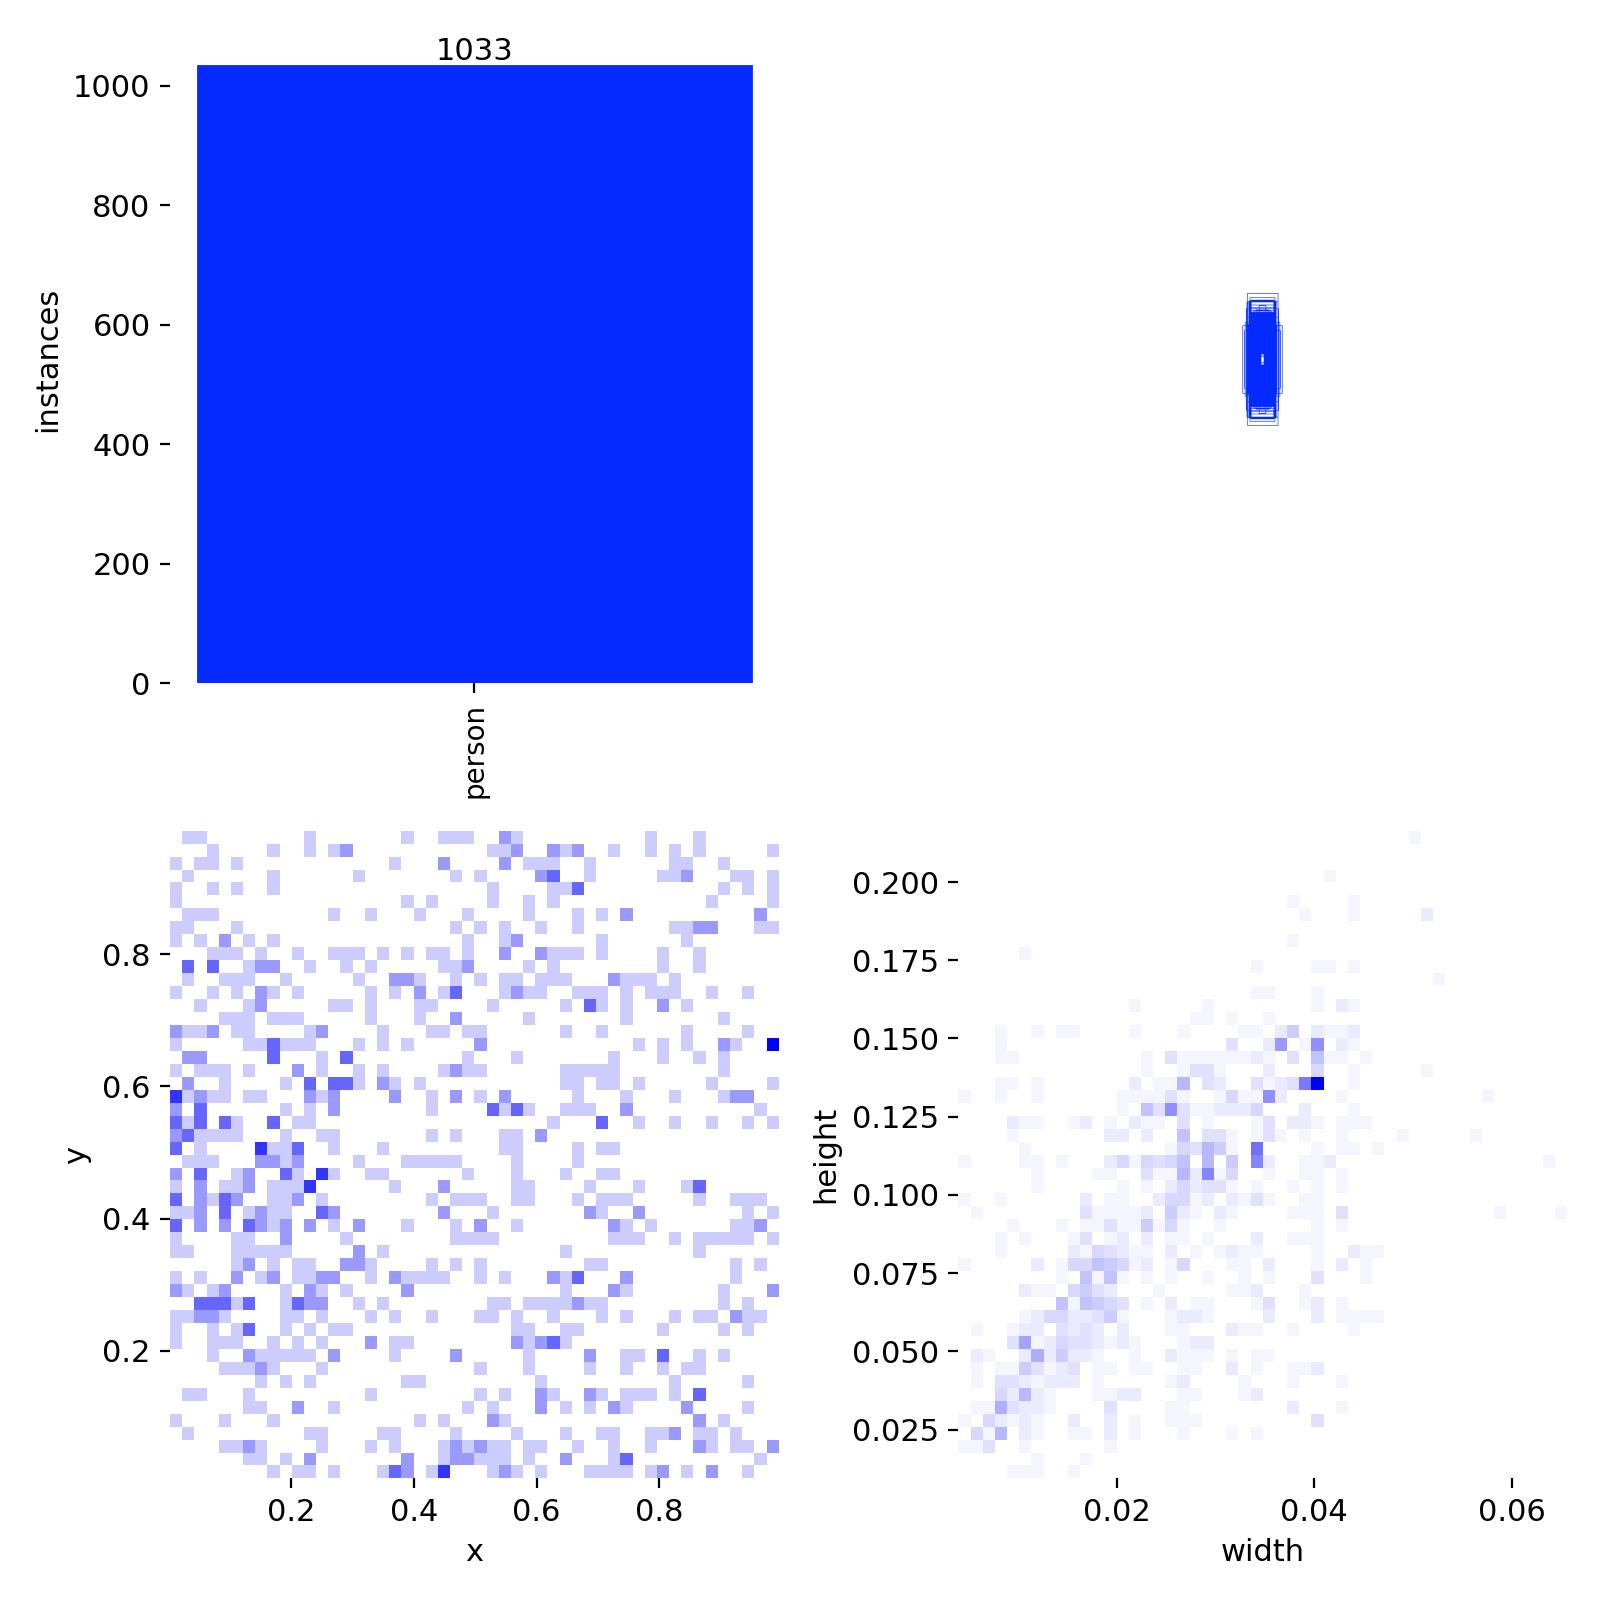

In [ ]:
Image(filename='/content/runs/detect/train5/labels.jpg')


In [ ]:
!ls /content/drive/MyDrive/VIRAT


data.yaml  README.dataset.txt  README.roboflow.txt  test  train


In [ ]:
!cat /content/drive/MyDrive/VIRAT/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['person']

roboflow:
  workspace: radoslaw-kawczak
  project: virat-v2
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/radoslaw-kawczak/virat-v2/dataset/3

In [ ]:
%%writefile /content/drive/MyDrive/VIRAT/data.yaml
train: /content/drive/MyDrive/VIRAT/train
val: /content/drive/MyDrive/VIRAT/test
test: /content/drive/MyDrive/VIRAT/test

nc: 1
names: ['person']


Overwriting /content/drive/MyDrive/VIRAT/data.yaml


In [ ]:
!ls /content/drive/MyDrive/VIRAT/train | head
!ls /content/drive/MyDrive/VIRAT/test | head


images
images
labels


In [ ]:
!ls /content/runs/detect/train


args.yaml  weights


In [ ]:
!ls /content/runs/detect/train/weights


In [42]:
!ls /content/runs/detect/


val


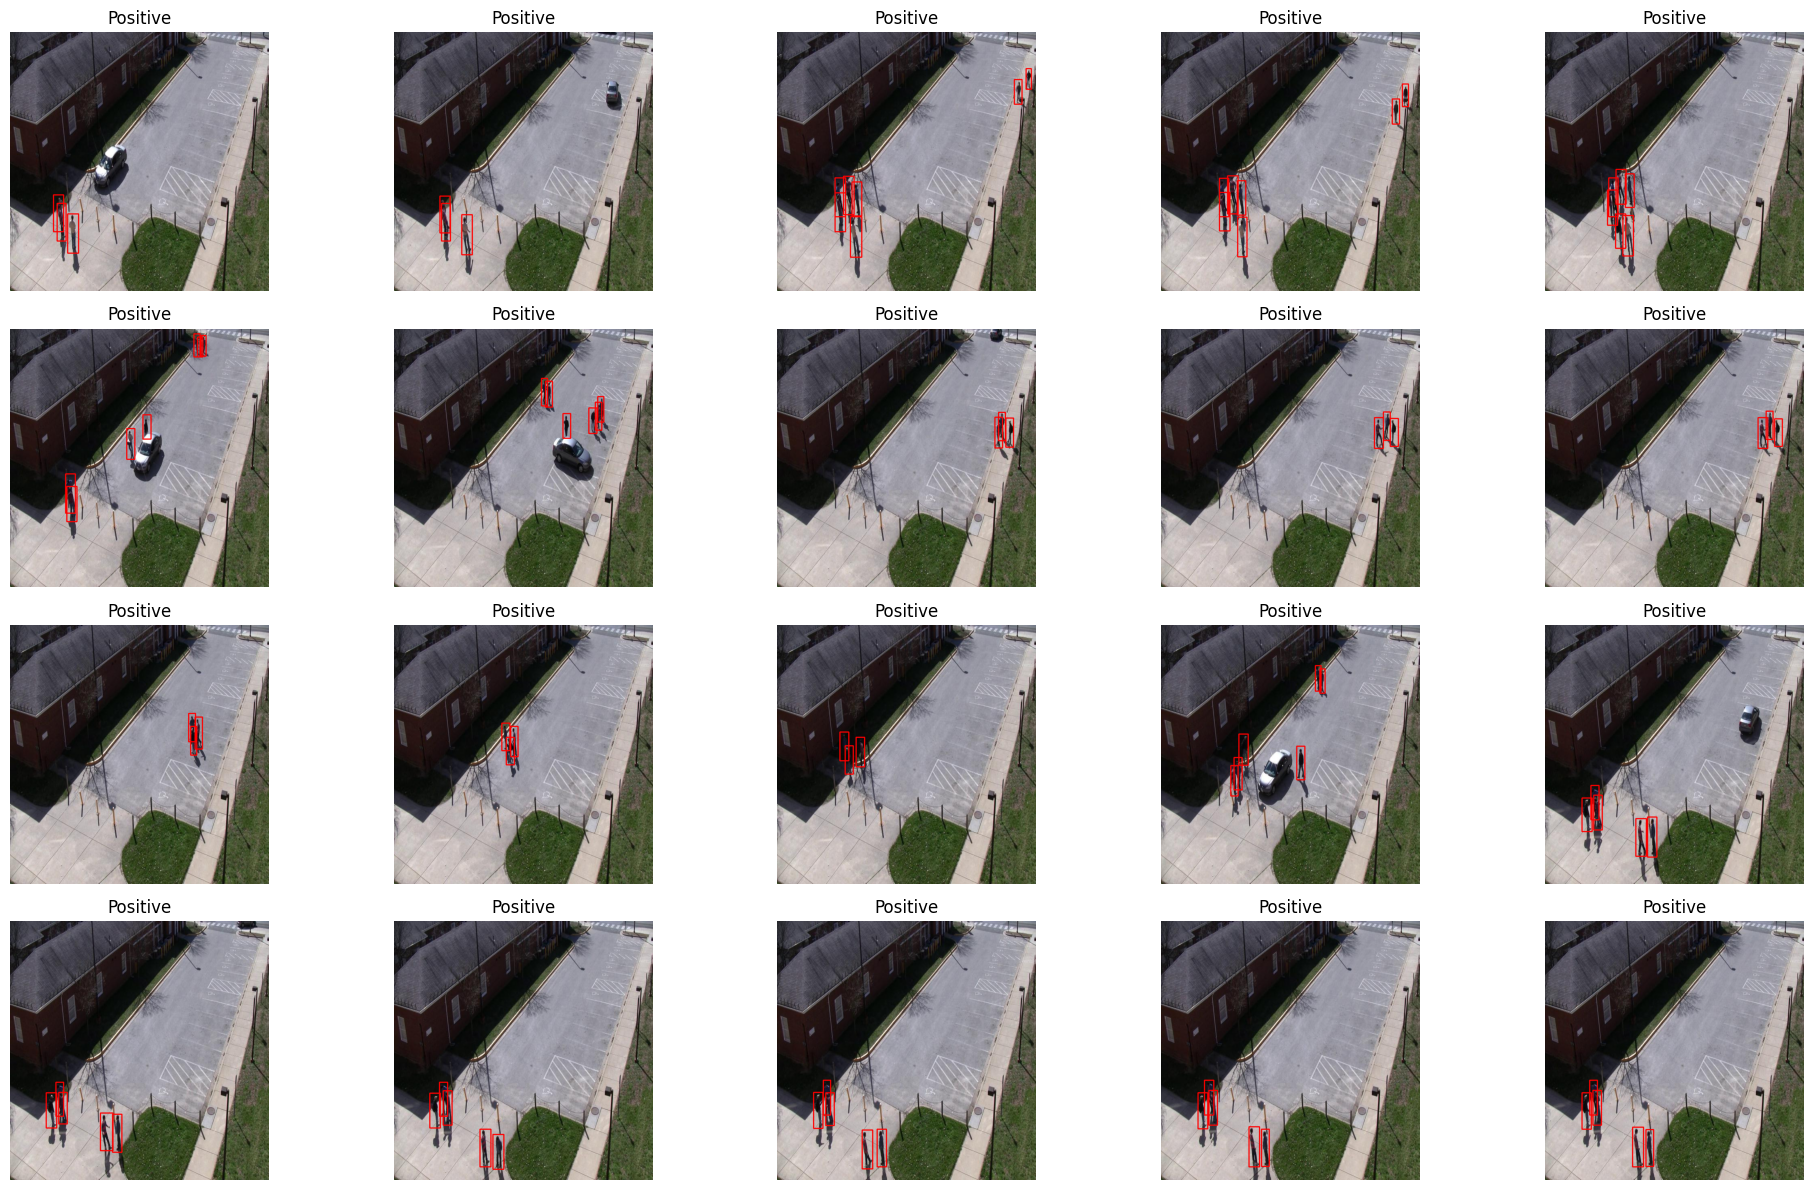

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
from pathlib import Path

# Get test images
image_paths = sorted(glob.glob("/content/drive/MyDrive/VIRAT/test/images/*.jpg"))[:20]  # first 20
label_folder = "/content/drive/MyDrive/VIRAT/test/labels/"

# Grid size
rows, cols = 4, 5
plt.figure(figsize=(20, 12))

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    label_path = Path(label_folder) / (Path(img_path).stem + ".txt")

    if label_path.exists():
        with open(label_path, 'r') as f:
            for line in f:
                cls, x_center, y_center, w, h = map(float, line.strip().split())
                h_img, w_img, _ = img.shape

                x1 = int((x_center - w/2) * w_img)
                y1 = int((y_center - h/2) * h_img)
                x2 = int((x_center + w/2) * w_img)
                y2 = int((y_center + h/2) * h_img)

                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title("Positive" if label_path.exists() else "Negative")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [41]:
import os, shutil, random

# Paths
base_path = "/content/drive/MyDrive/VIRAT"
train_img_src = os.path.join(base_path, "train/images")
train_lbl_src = os.path.join(base_path, "train/labels")

mini_train_img = os.path.join(base_path, "train_100/images")
mini_train_lbl = os.path.join(base_path, "train_100/labels")

# Make new folders if not exist
os.makedirs(mini_train_img, exist_ok=True)
os.makedirs(mini_train_lbl, exist_ok=True)

# Pick 100 random images
images = os.listdir(train_img_src)
sample_images = random.sample(images, min(100, len(images)))

# Copy both image + label
for img_name in sample_images:
    shutil.copy(os.path.join(train_img_src, img_name), mini_train_img)
    label_name = img_name.replace(".jpg", ".txt").replace(".png", ".txt")
    src_label = os.path.join(train_lbl_src, label_name)
    if os.path.exists(src_label):
        shutil.copy(src_label, mini_train_lbl)

print(f"✅ Copied {len(sample_images)} images for mini training set.")


✅ Copied 100 images for mini training set.


In [43]:
%%writefile /content/drive/MyDrive/VIRAT/data_mini.yaml
# data_mini.yaml for YOLOv8 100-image training

nc: 4
names: ['person', 'car', 'bicycle', 'dog']

train: /content/drive/MyDrive/VIRAT/train_100/images
val: /content/drive/MyDrive/VIRAT/train_100/images
test: /content/drive/MyDrive/VIRAT/train_100/images


Writing /content/drive/MyDrive/VIRAT/data_mini.yaml


In [45]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # small model for quick training
model.train(
    data="/content/drive/MyDrive/VIRAT/data_mini.yaml",
    epochs=5,                # quick run
    batch=8,
    imgsz=640,
    project="/content/drive/MyDrive/VIRAT/runs/detect",
    name="virat_mini_train"
)


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/VIRAT/data_mini.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=virat_mini_train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e40346bf200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [51]:
!ls -R /content/drive/MyDrive/VIRAT/runs/detect/


/content/drive/MyDrive/VIRAT/runs/detect/:
test_results  virat_mini_train	virat_mini_train2  virat_mini_train3

/content/drive/MyDrive/VIRAT/runs/detect/test_results:

/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train:
args.yaml  weights

/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train/weights:

/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train2:
args.yaml  weights

/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train2/weights:

/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3:
args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg

/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/weights:
best.pt  last.pt


In [52]:
!ls /content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/


args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


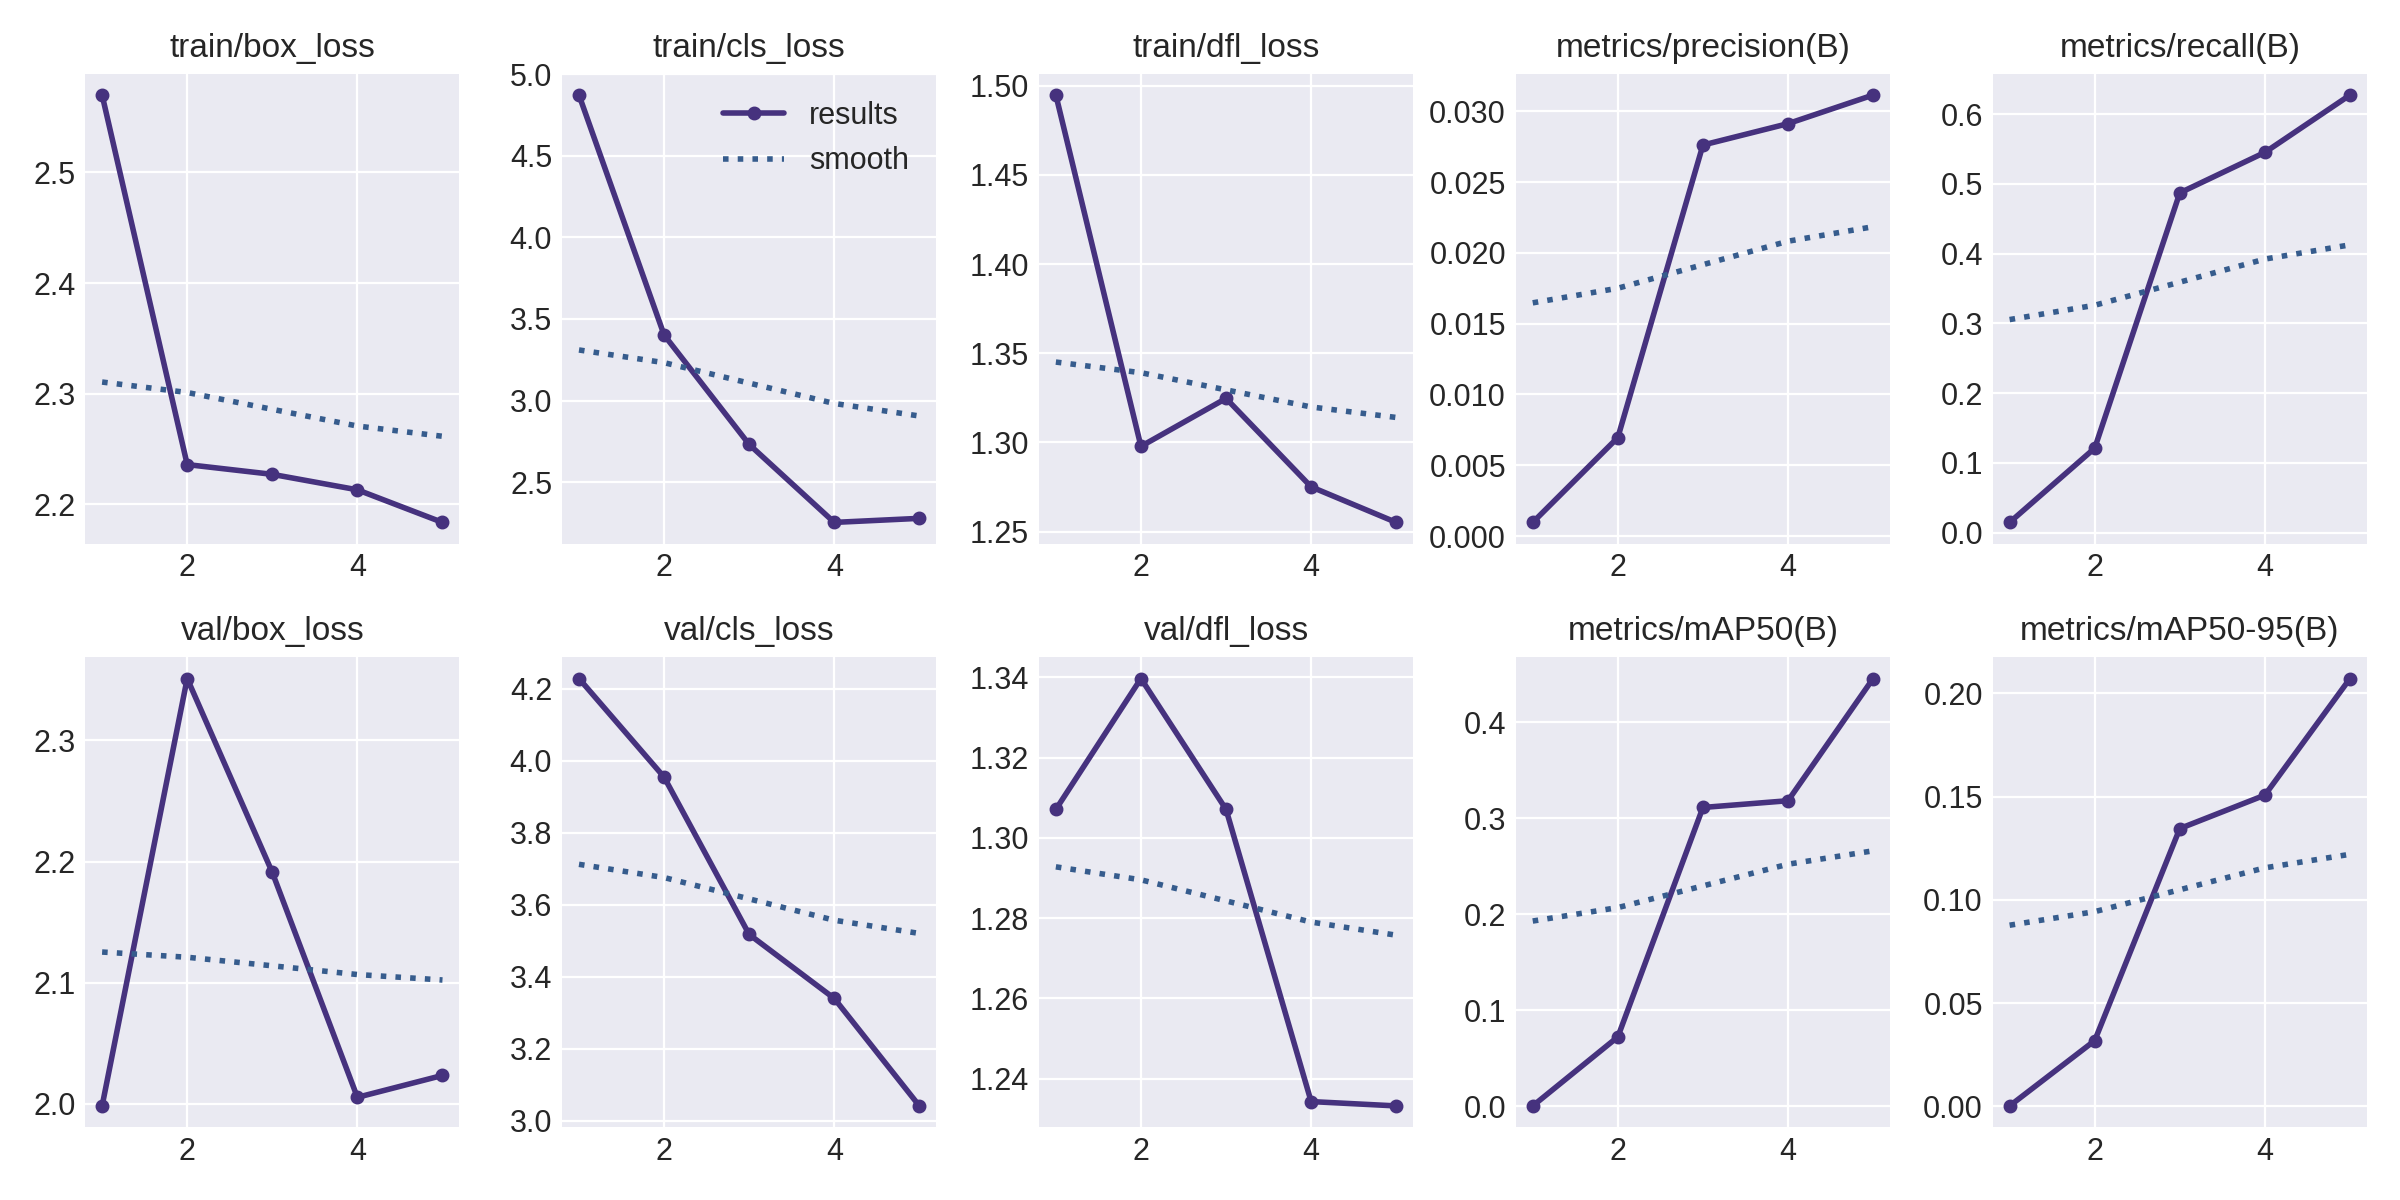

In [53]:
from IPython.display import Image, display

# Display the summary training results (Precision, Recall, mAP curves)
display(Image(filename="/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/results.png", width=800))


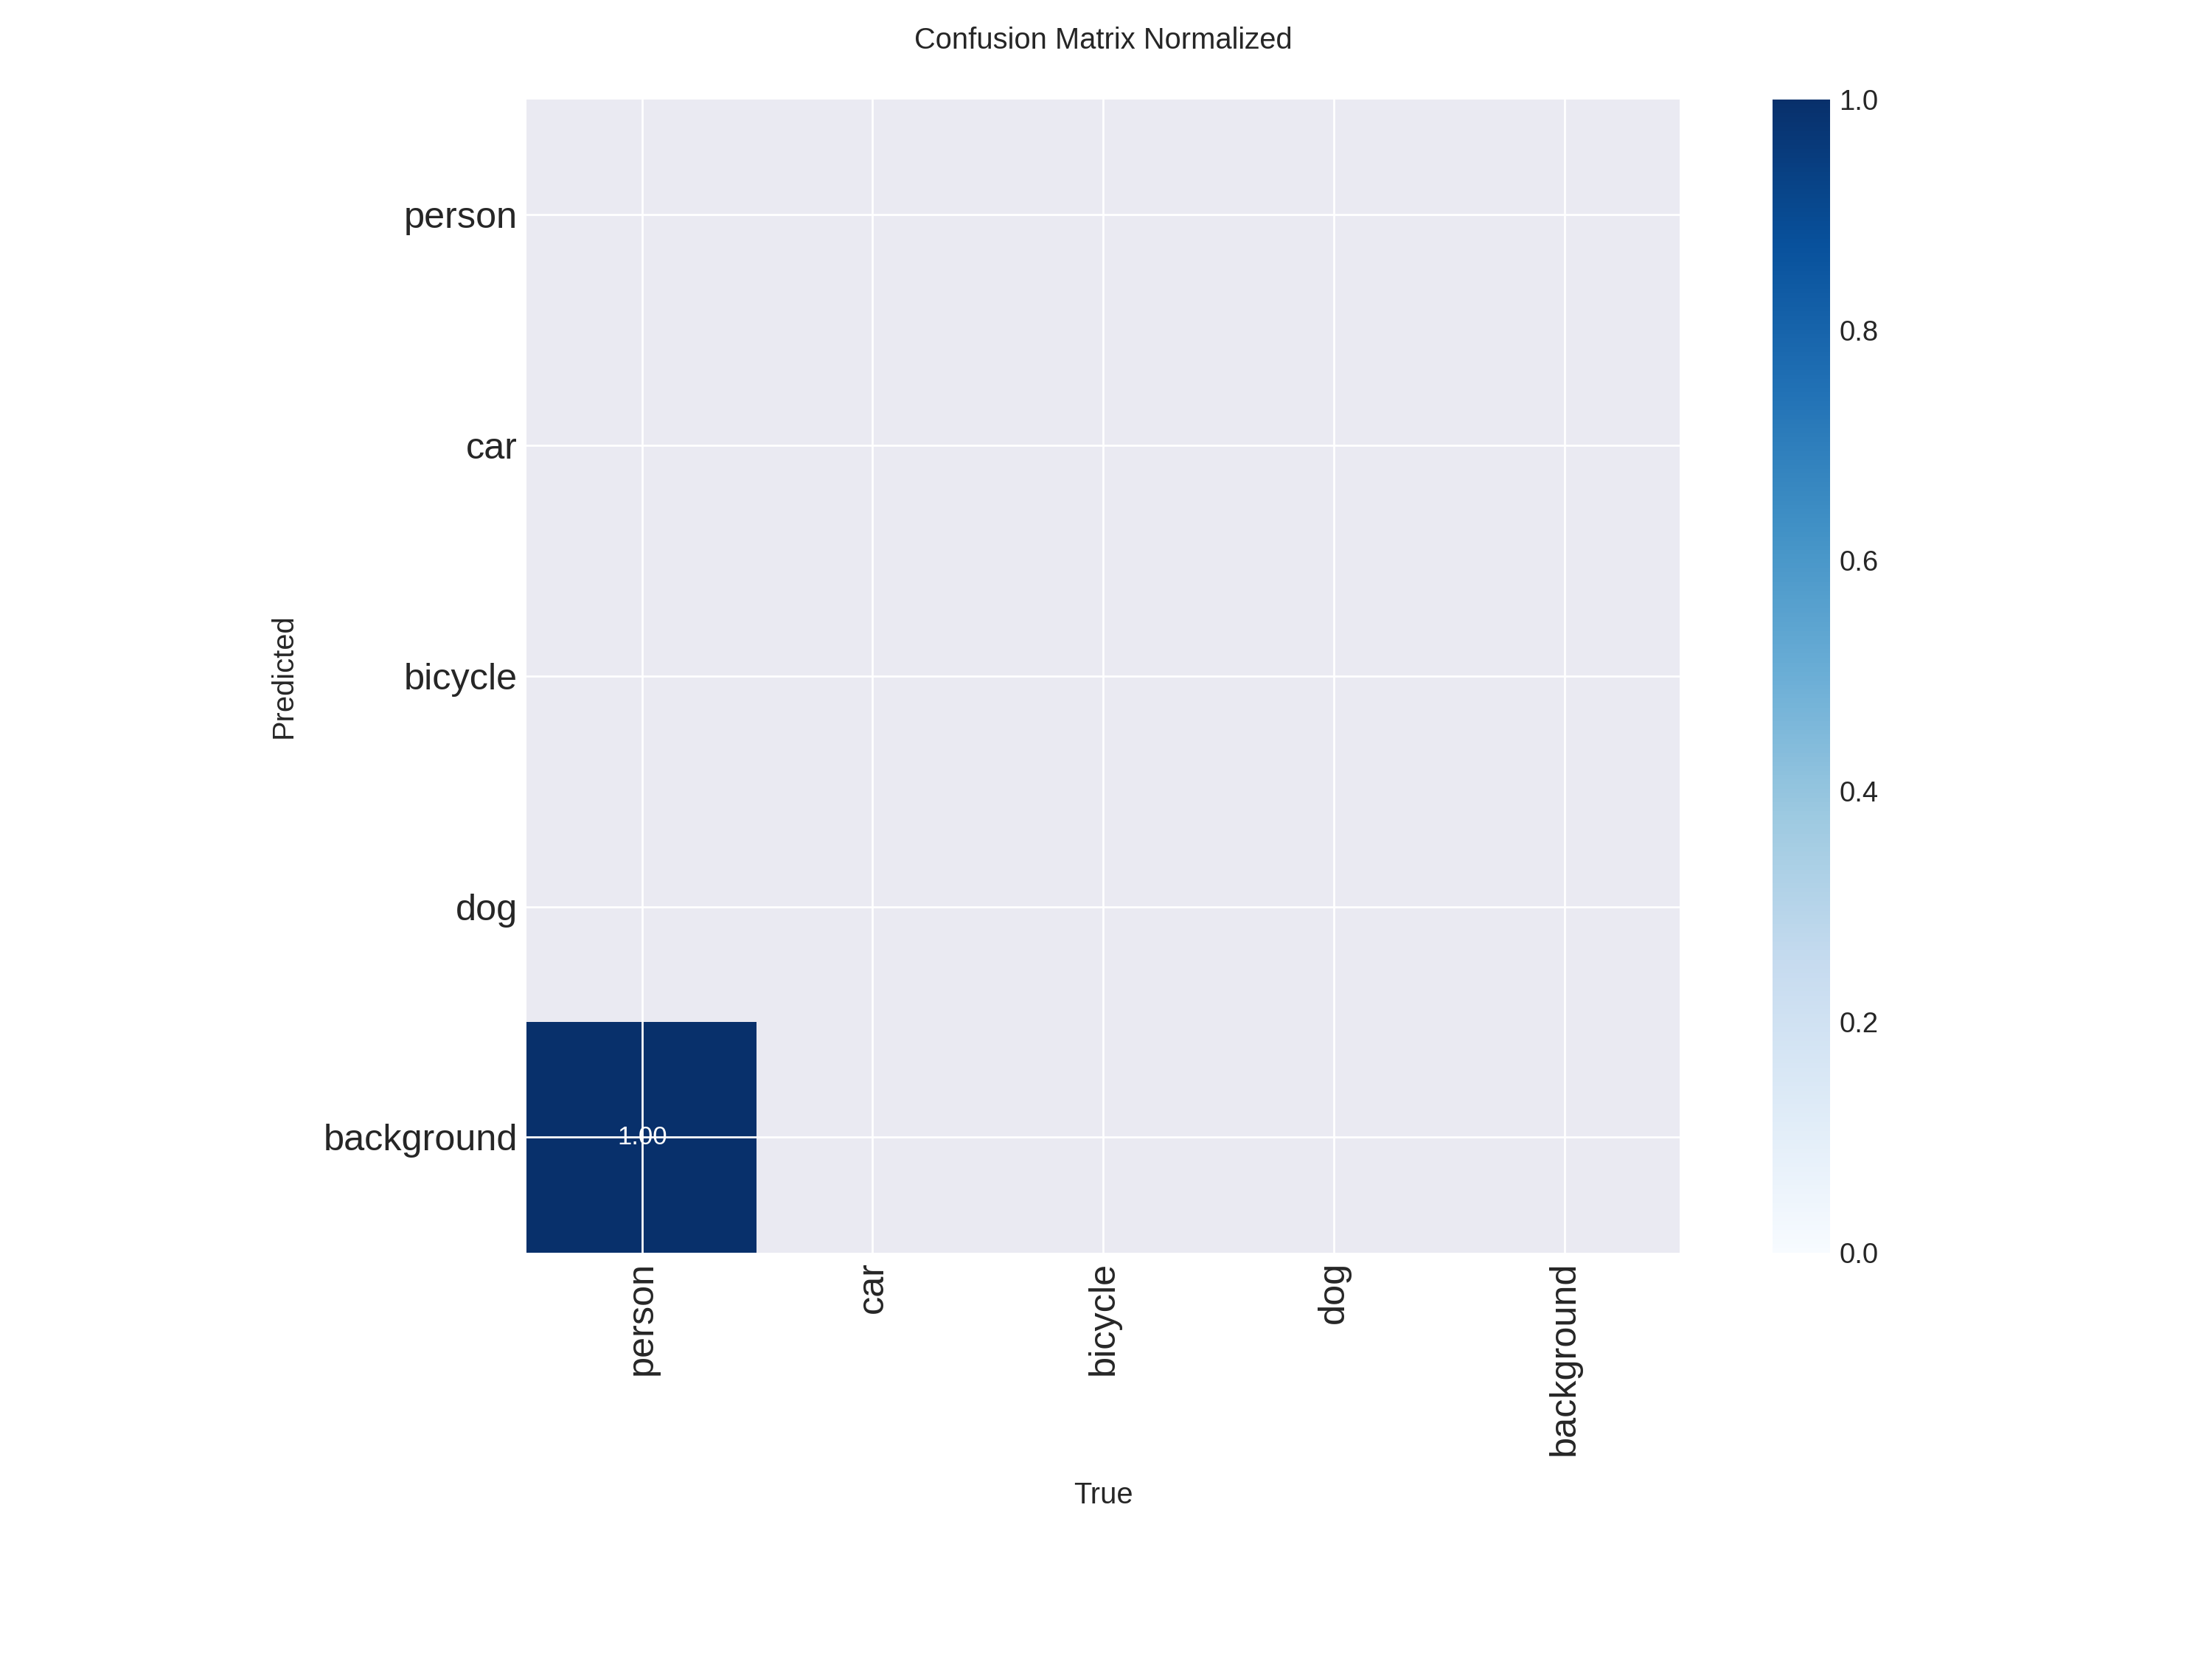

In [54]:
display(Image(filename="/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/confusion_matrix_normalized.png", width=800))


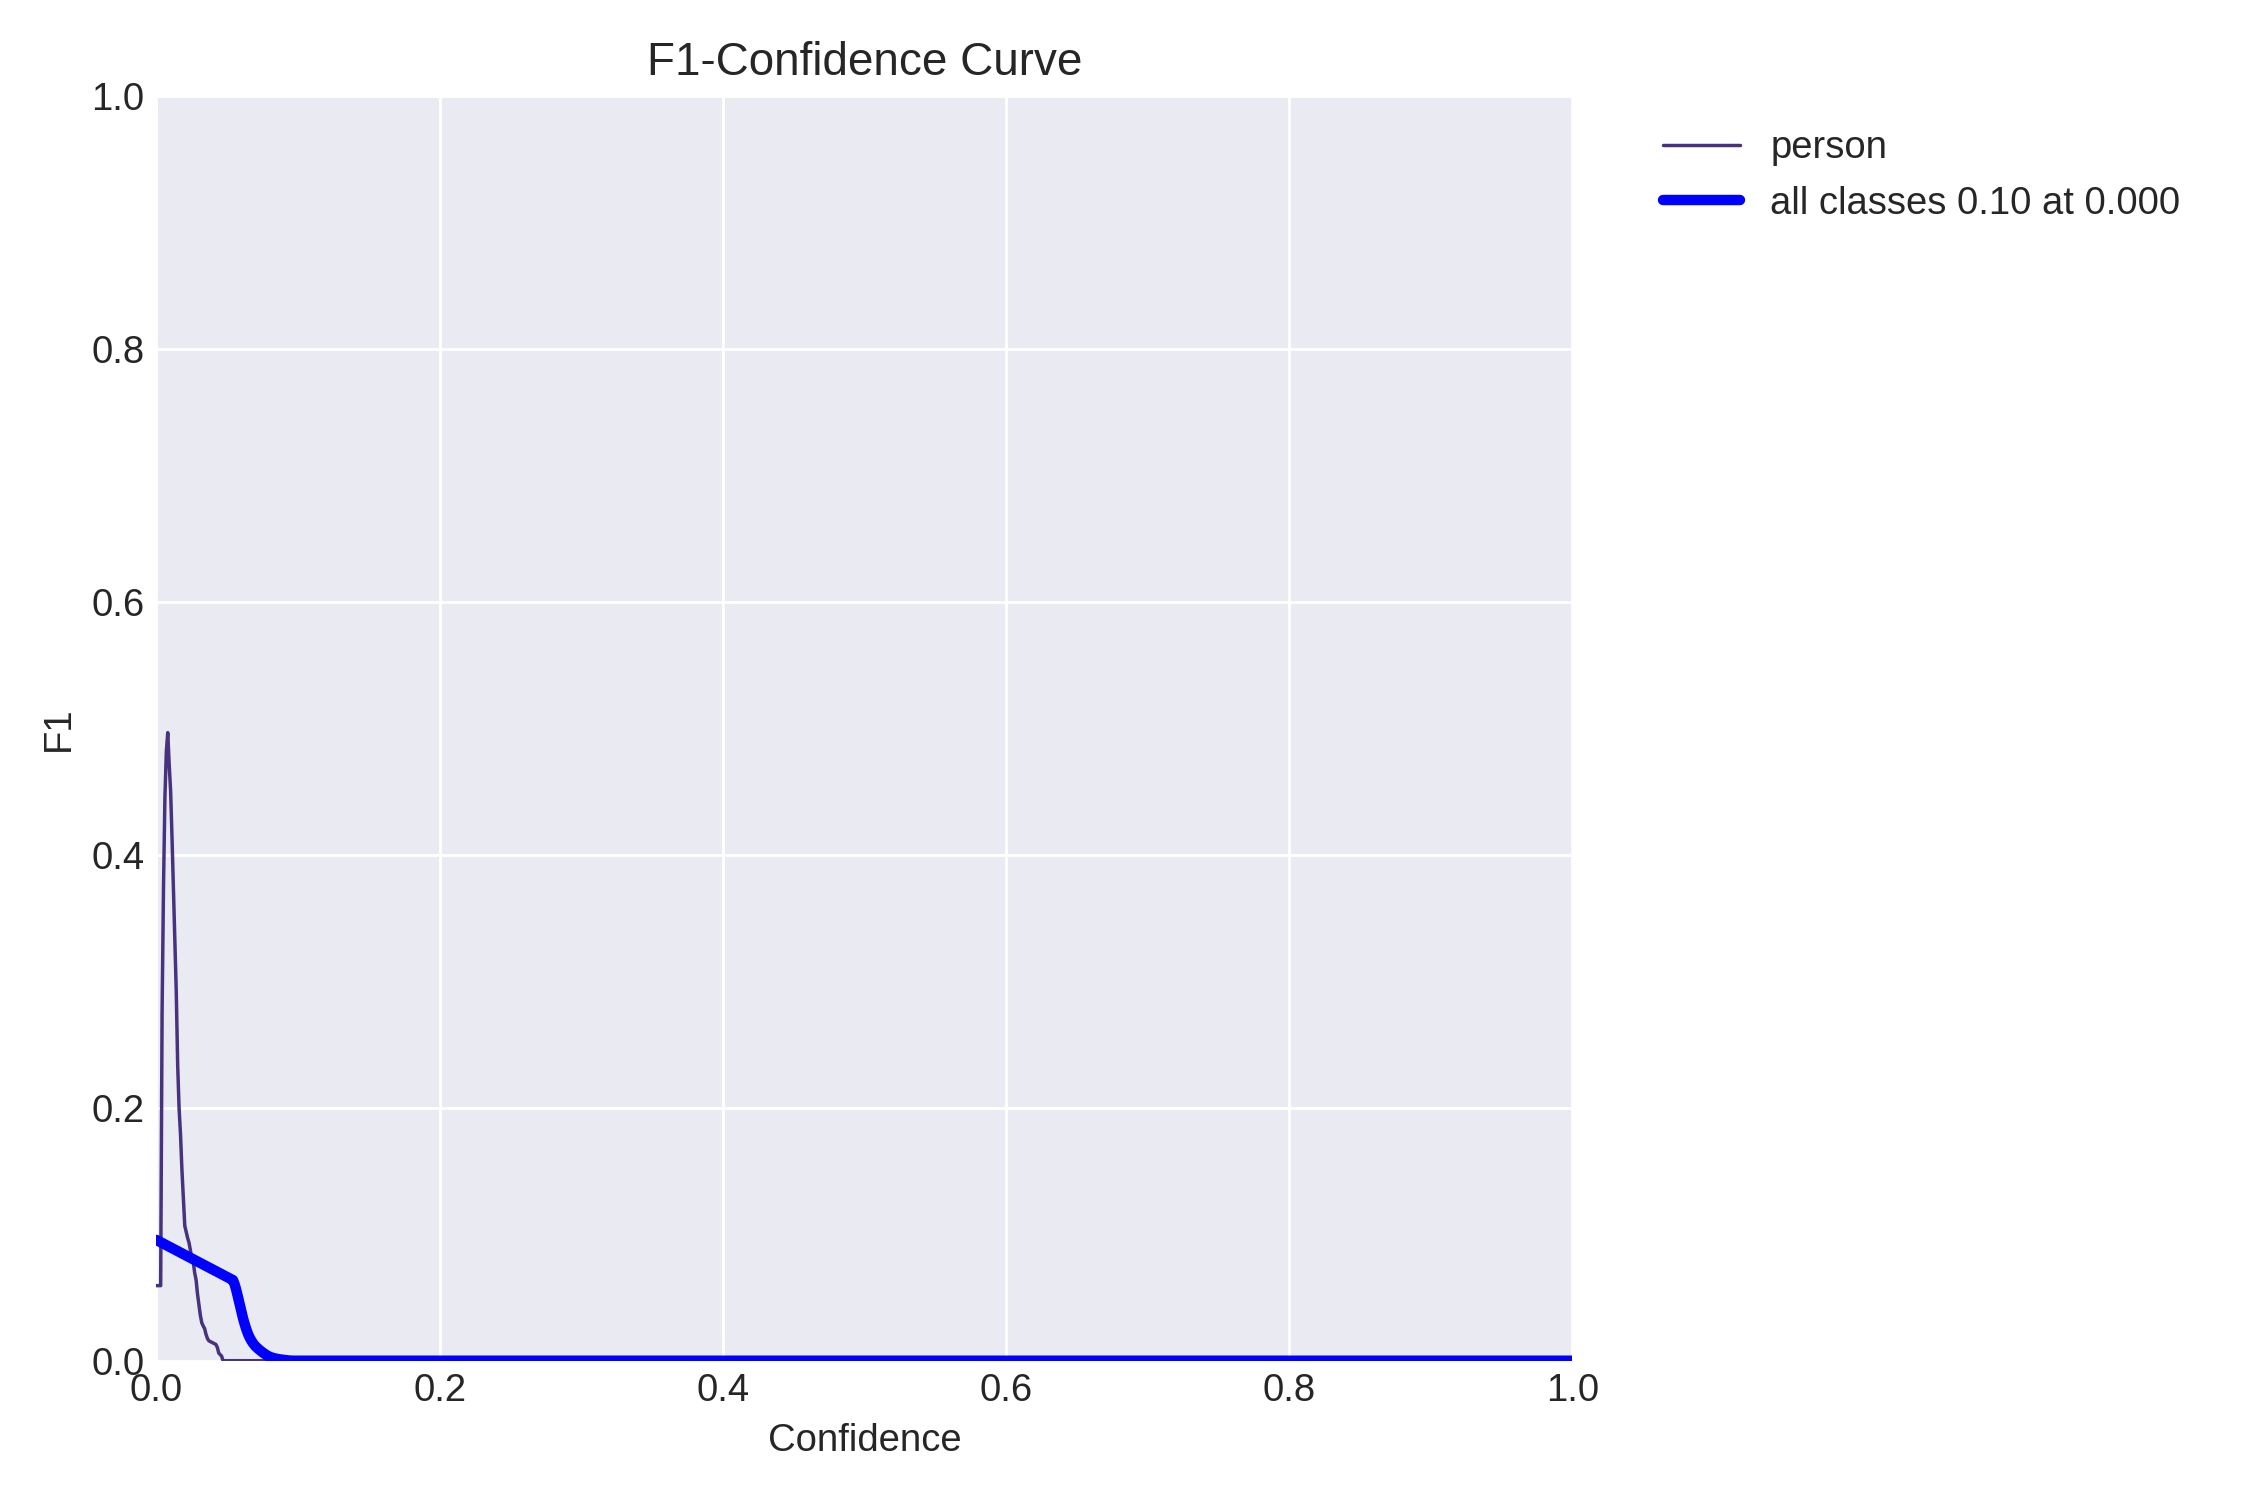

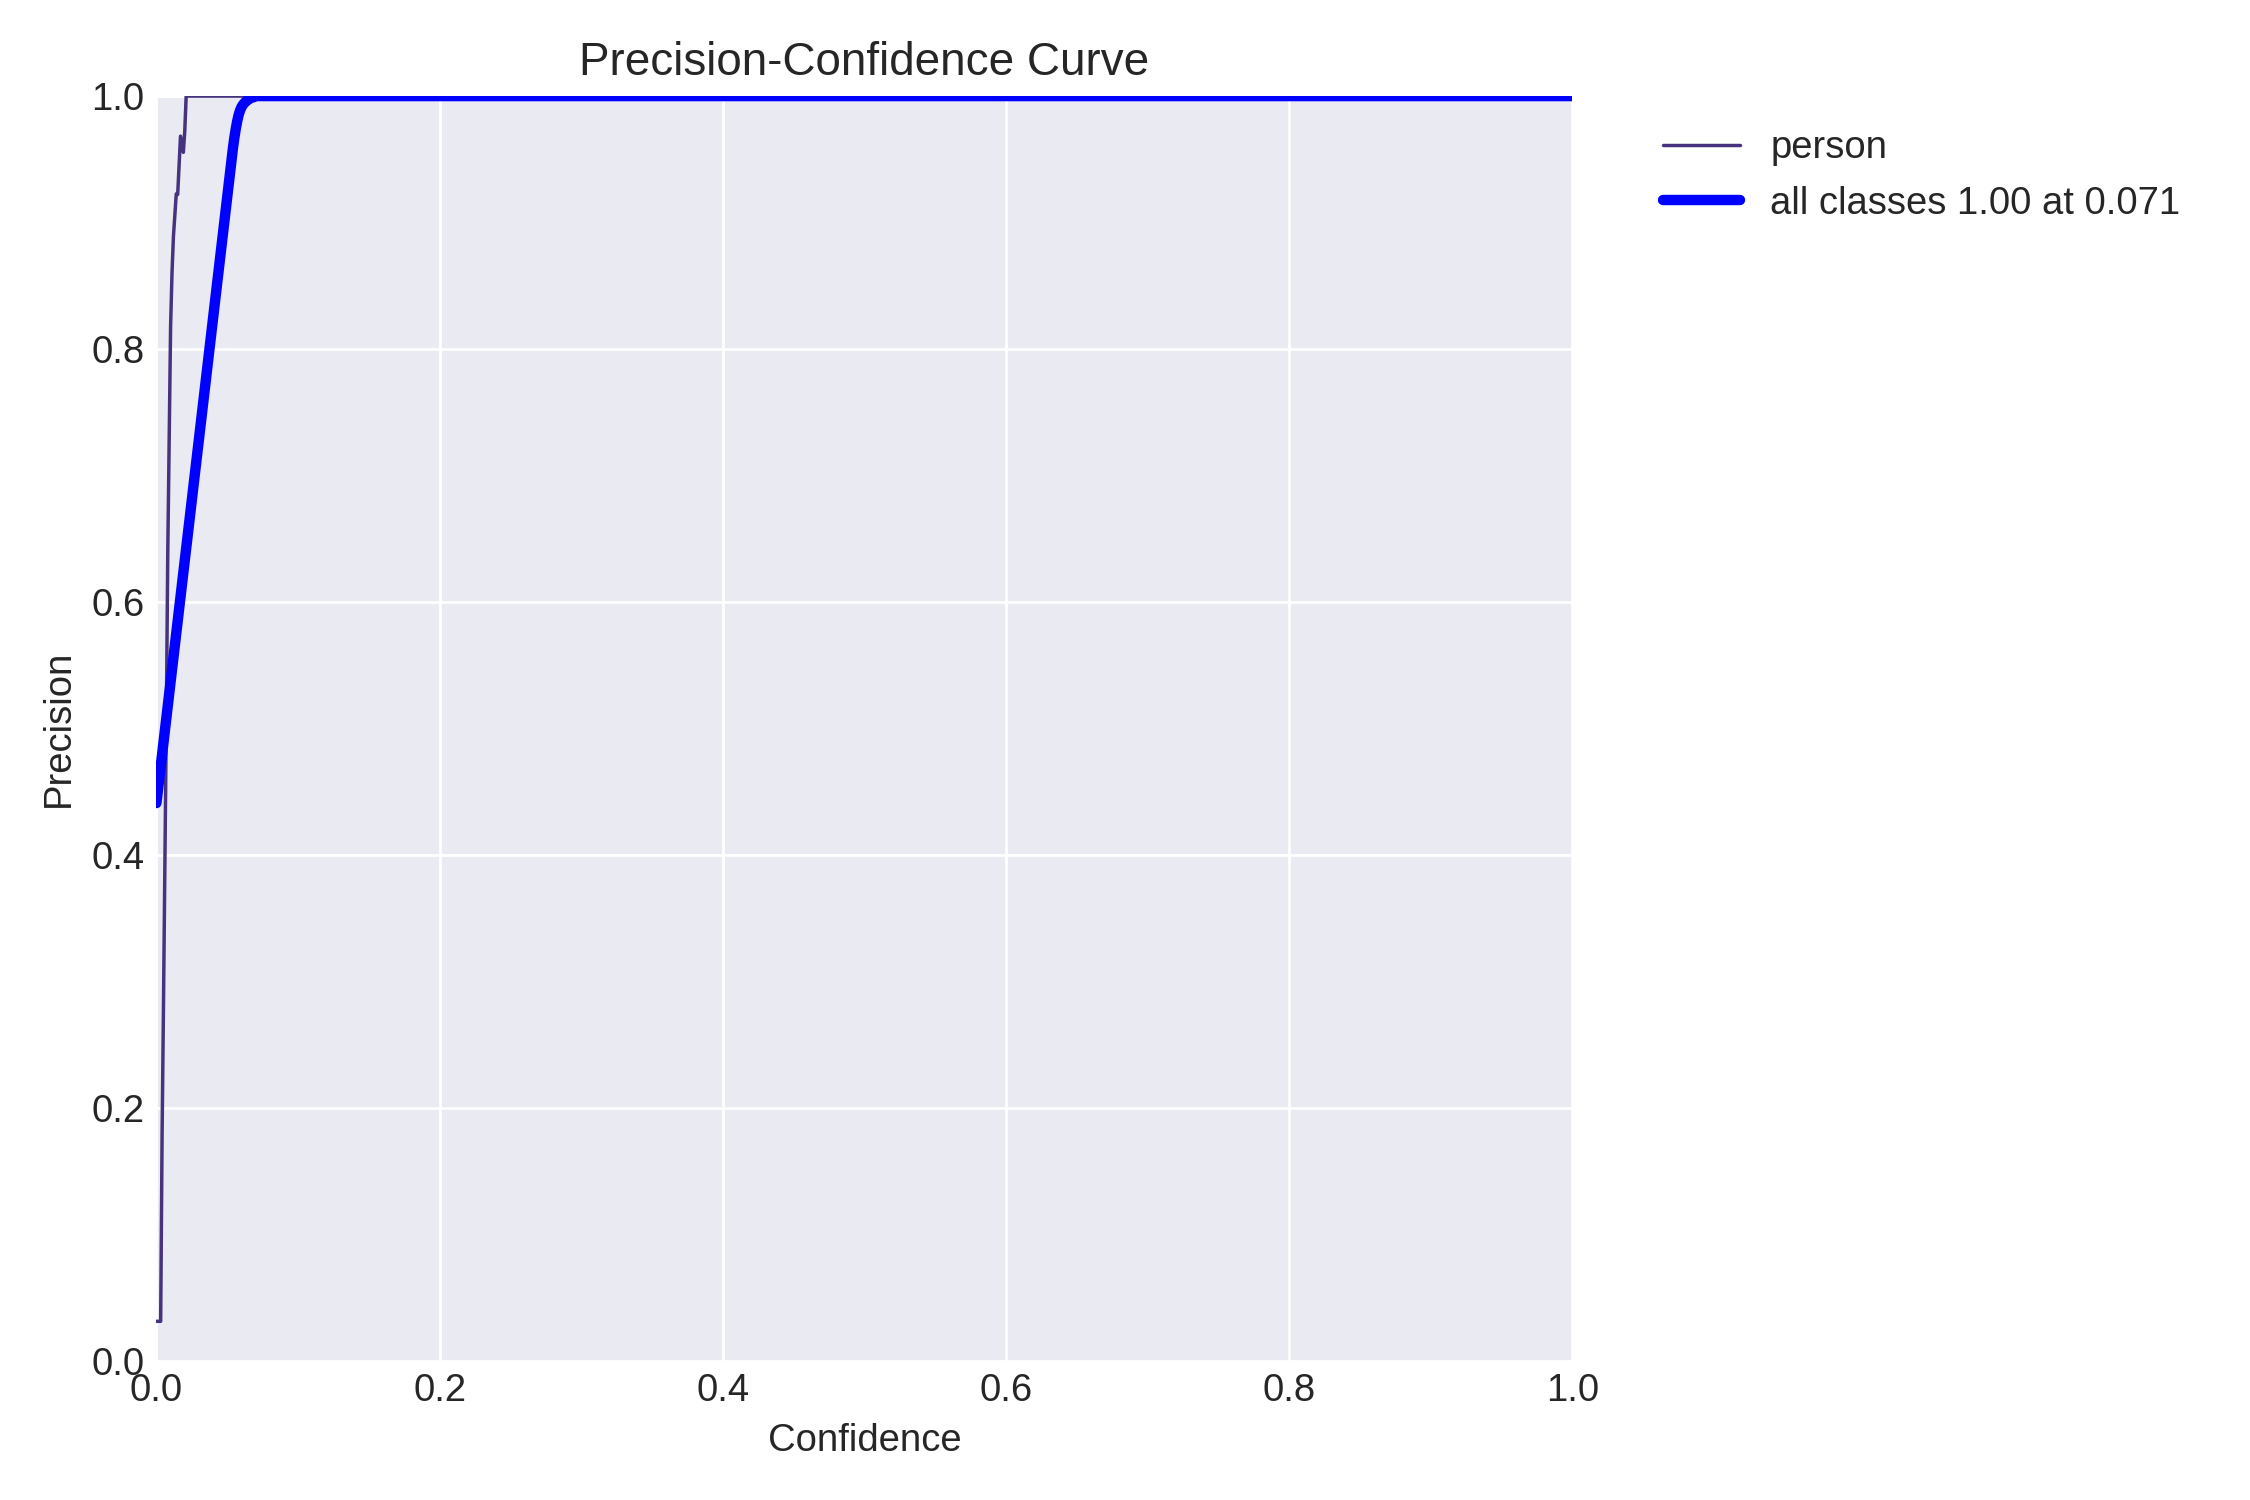

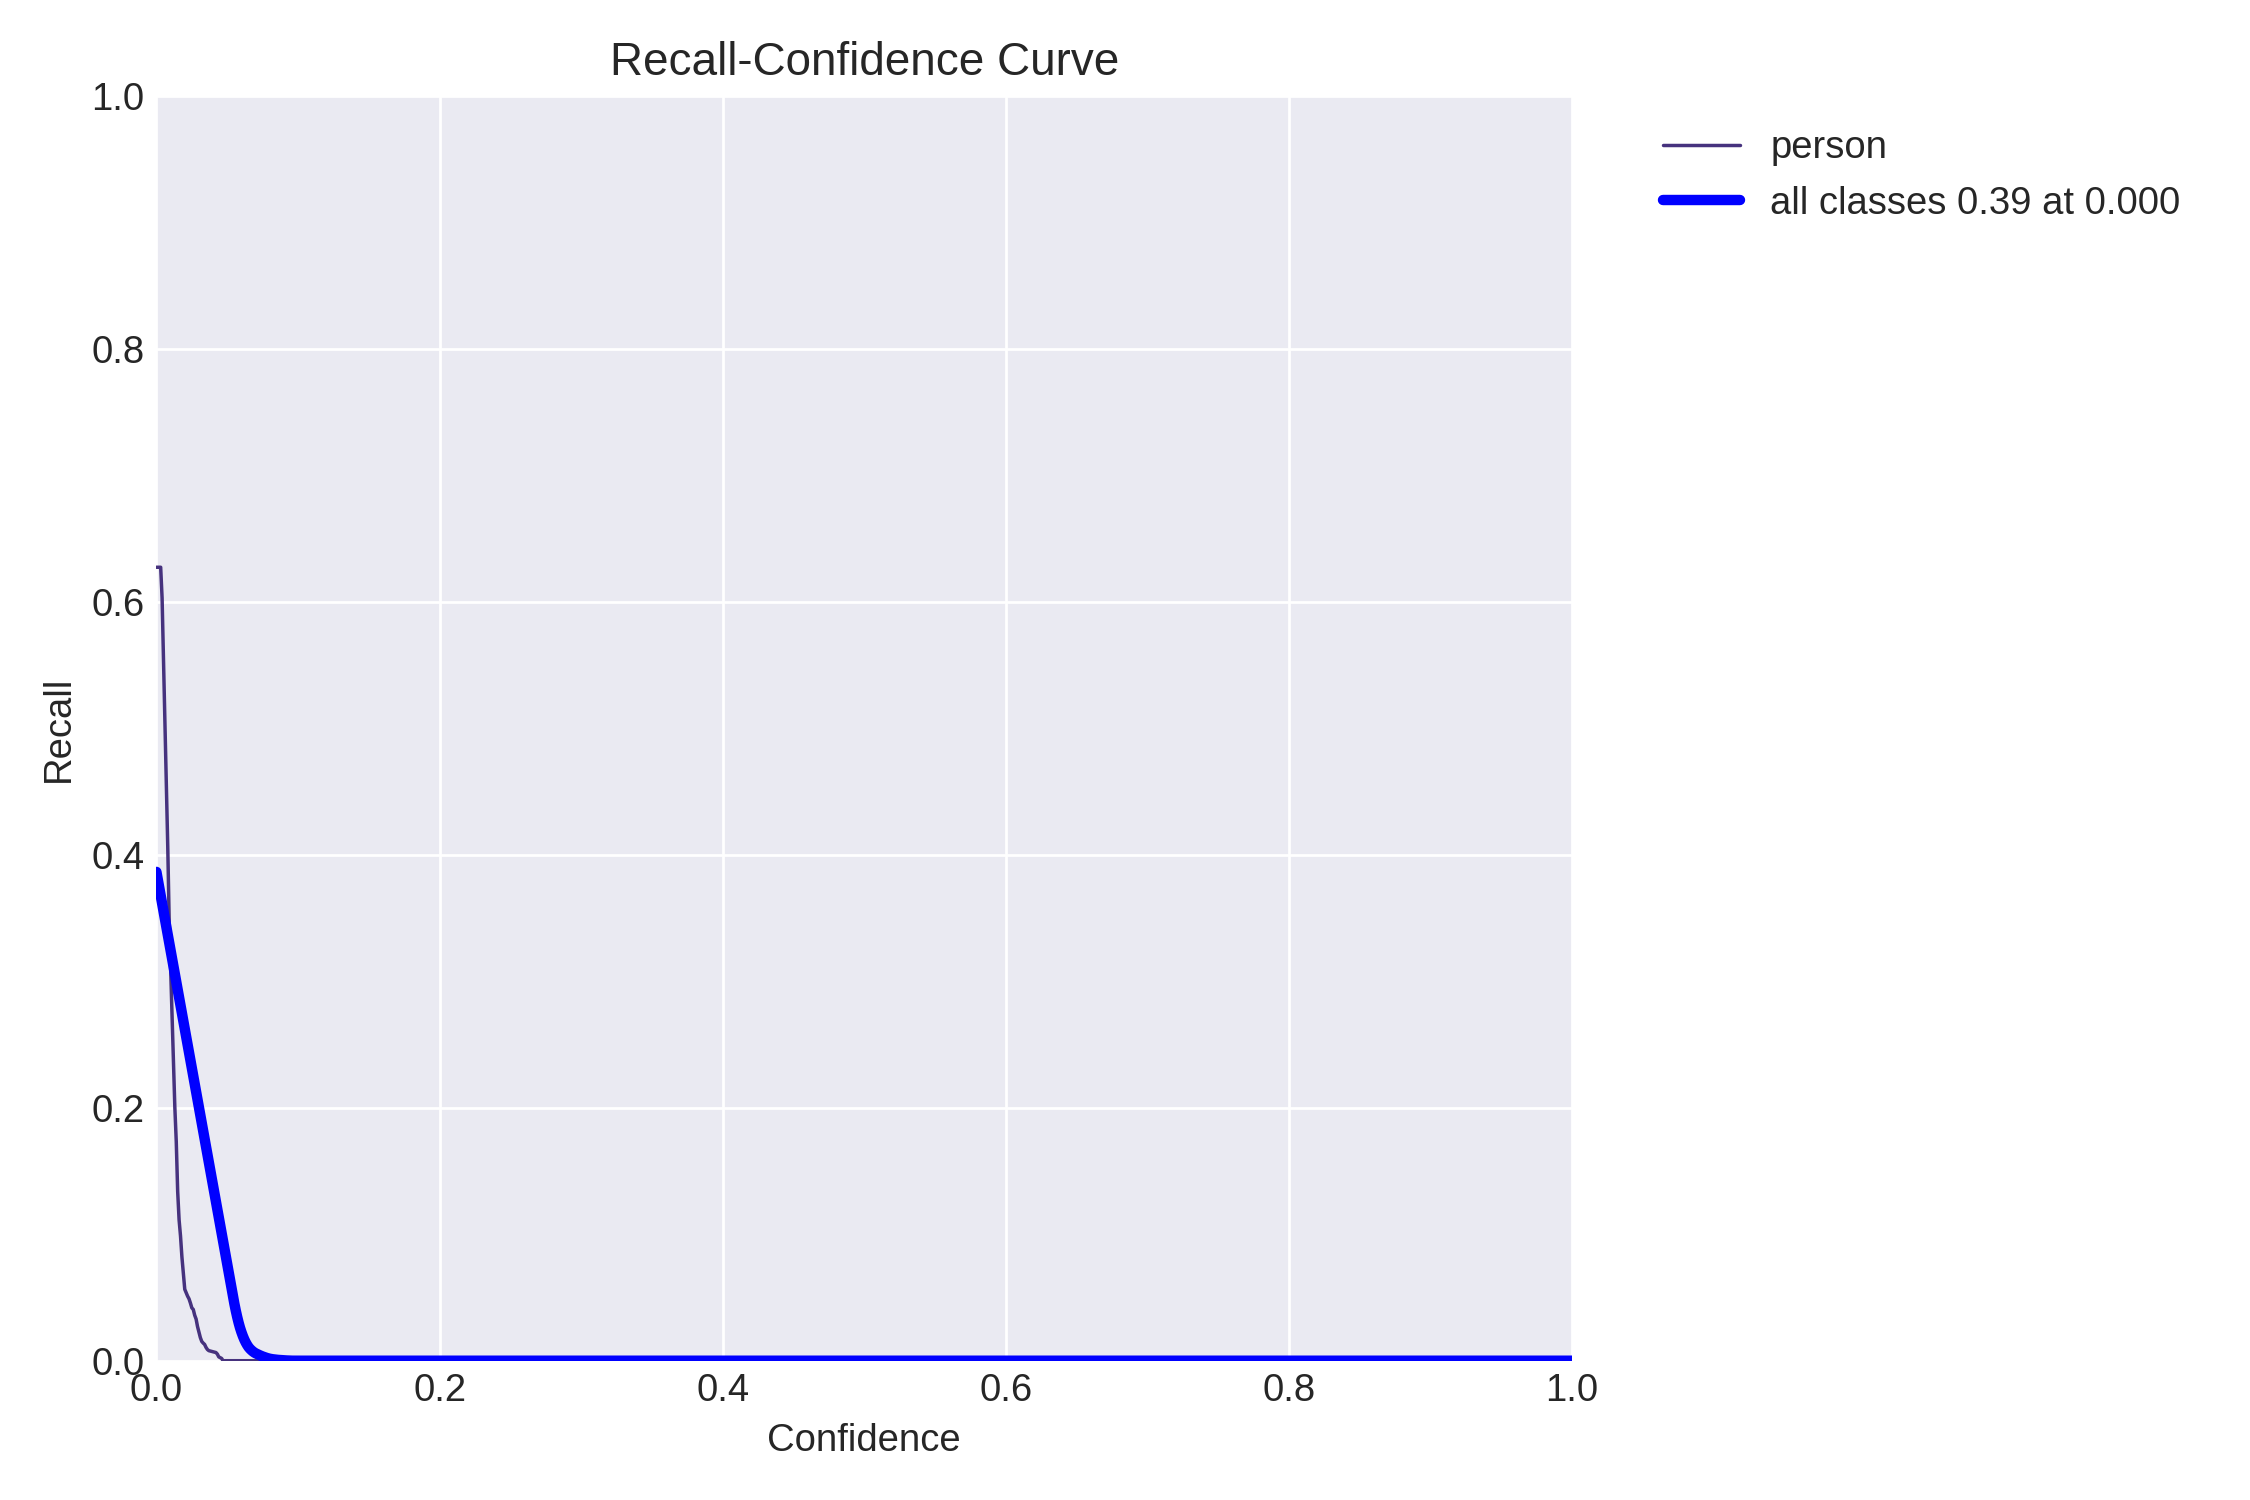

In [55]:
display(Image(filename="/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/BoxF1_curve.png", width=600))
display(Image(filename="/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/BoxP_curve.png", width=600))
display(Image(filename="/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/BoxR_curve.png", width=600))


In [56]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/results.csv")
print(df.tail())  # Show last few epochs' metrics


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   6.50228         2.57005         4.87163         1.49476   
1      2  11.18750         2.23587         3.40216         1.29780   
2      3  15.12670         2.22704         2.73133         1.32468   
3      4  18.56060         2.21305         2.25393         1.27510   
4      5  21.91440         2.18357         2.27884         1.25516   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00097            0.01452           0.00050   
1               0.00696            0.12097           0.07238   
2               0.02761            0.48710           0.31144   
3               0.02912            0.54516           0.31846   
4               0.03114            0.62742           0.44577   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00022       1.99830       4.22907       1.30710  0.000150   
1              0.03183       2.35100  

Available columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


/tmp/ipython-input-1504640857.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


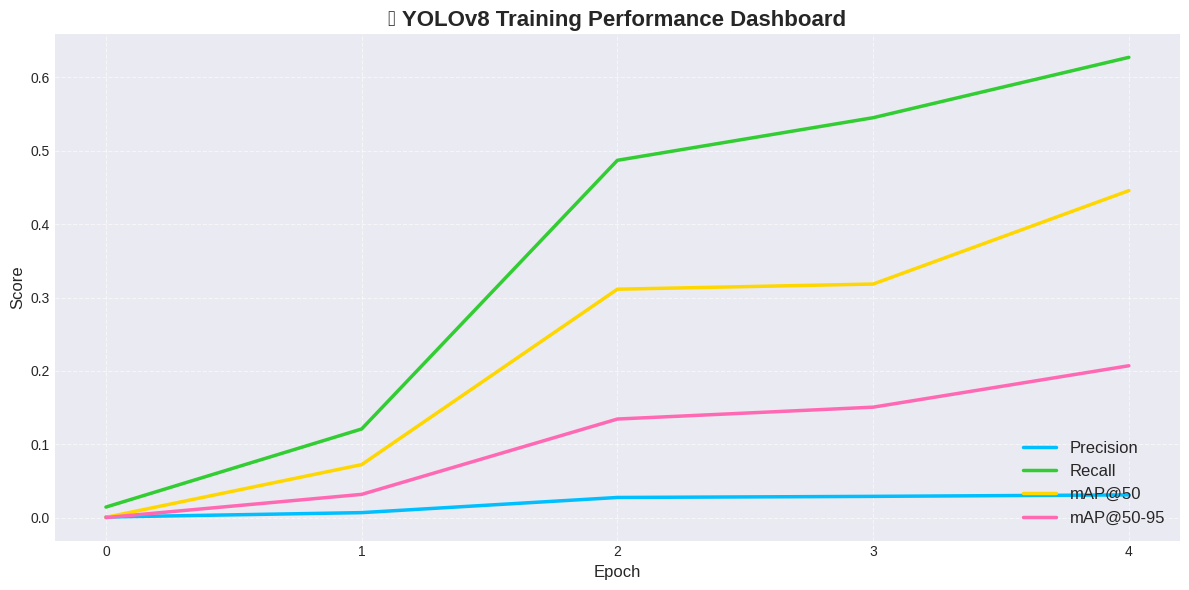

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path to your YOLOv8 results.csv
results_csv = "/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/results.csv"

# Load data
df = pd.read_csv(results_csv)

# Verify available columns
print("Available columns:", list(df.columns))

# Create dashboard
plt.figure(figsize=(12, 6))
plt.style.use("seaborn-v0_8-darkgrid")

# Plot key performance metrics
plt.plot(df.index, df["metrics/precision(B)"], label="Precision", linewidth=2.5, color="#00BFFF")
plt.plot(df.index, df["metrics/recall(B)"], label="Recall", linewidth=2.5, color="#32CD32")
plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@50", linewidth=2.5, color="#FFD700")
plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@50-95", linewidth=2.5, color="#FF69B4")

# Titles and labels
plt.title("📊 YOLOv8 Training Performance Dashboard", fontsize=16, weight="bold")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Grid, legend, and background
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12, loc="lower right")
plt.tight_layout()

# Show the dashboard
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


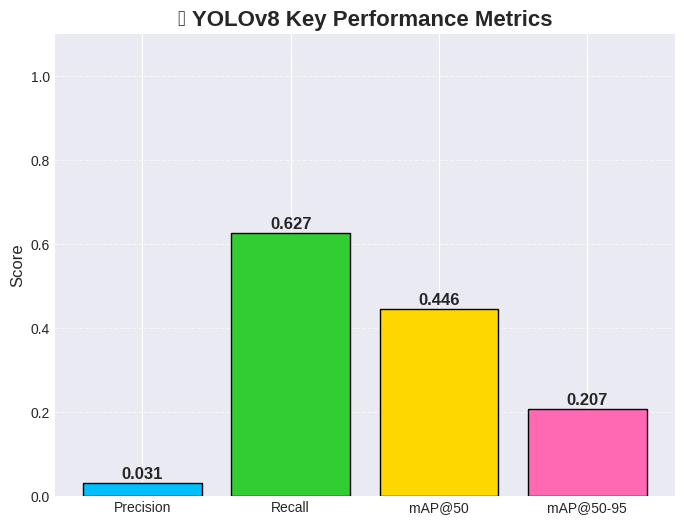

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your results.csv
results_csv = "/content/drive/MyDrive/VIRAT/runs/detect/virat_mini_train3/results.csv"

# Load data
df = pd.read_csv(results_csv)

# Get the final epoch row (last line in the CSV)
final_results = df.iloc[-1]

# Extract key metrics
metrics = {
    "Precision": final_results["metrics/precision(B)"],
    "Recall": final_results["metrics/recall(B)"],
    "mAP@50": final_results["metrics/mAP50(B)"],
    "mAP@50-95": final_results["metrics/mAP50-95(B)"]
}

# Create a colorful bar chart
plt.figure(figsize=(8, 6))
colors = ["#00BFFF", "#32CD32", "#FFD700", "#FF69B4"]
plt.bar(metrics.keys(), metrics.values(), color=colors, edgecolor="black")

# Add text labels on bars
for i, (metric, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.01, f"{value:.3f}", ha="center", fontsize=12, fontweight="bold")

# Titles and labels
plt.title("🎯 YOLOv8 Key Performance Metrics", fontsize=16, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()
